<a href="https://colab.research.google.com/github/saugata-malakar/ML-CaPsule/blob/master/TRINAKSHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load dataset
file_path = "/content/user_x_service_x_biweek_data.csv"
df = pd.read_csv(file_path)

# --- Basic Info ---
print("Dataset Info:")
print(df.info())
print("\nShape of the dataset:", df.shape)

# --- Preview the dataset ---
print("\nFirst 5 Rows:")
print(df.head())

# --- Summary statistics for numeric fields ---
print("\nSummary Statistics:")
print(df.describe())

# --- Check for missing values ---
print("\nMissing Values:")
print(df.isnull().sum())

# --- Top 10 Most Common Designations ---
print("\nTop 10 Designations by Frequency:")
print(df['desig_name'].value_counts().head(10))

# --- Top 10 Departments by Record Count ---
print("\nTop 10 Departments:")
print(df['app_department_name'].value_counts().head(10))

# --- Top 10 Districts (Excluding Nulls) ---
print("\nTop 10 Districts:")
print(df['district_name'].dropna().value_counts().head(10))


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214270 entries, 0 to 214269
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   masked_userid        214270 non-null  int64  
 1   desig_name           214270 non-null  object 
 2   serviceid            214270 non-null  int64  
 3   service_name         214270 non-null  object 
 4   ta_deadline          214270 non-null  int64  
 5   app_department_name  214270 non-null  object 
 6   district_name        187489 non-null  object 
 7   bw_created_on        214270 non-null  int64  
 8   n_apps               214270 non-null  int64  
 9   process_days_bus     214270 non-null  float64
 10  delay1               214270 non-null  float64
 11  sendback_yn          212176 non-null  float64
 12  reject               214270 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 21.3+ MB
None

Shape of the dataset: (214270, 13)

First

In [2]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = "user_x_service_x_biweek_data.csv"  # Change if needed
df = pd.read_csv(file_path)

# ---------------- Basic Info ----------------
print("📦 Dataset Shape:", df.shape)
print("\n🧾 Column Info:")
print(df.info())

# ---------------- Missing Values ----------------
print("\n🕳️ Missing Values per Column:")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    "Missing Values": missing,
    "Percentage": missing_percent
}).sort_values("Missing Values", ascending=False)
print(missing_df)

# ---------------- Summary Stats ----------------
print("\n📊 Descriptive Stats for Numeric Columns:")
print(df.describe())

print("\n📋 Descriptive Stats for Categorical Columns:")
print(df.describe(include='object'))

# ---------------- Unique


📦 Dataset Shape: (214270, 13)

🧾 Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214270 entries, 0 to 214269
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   masked_userid        214270 non-null  int64  
 1   desig_name           214270 non-null  object 
 2   serviceid            214270 non-null  int64  
 3   service_name         214270 non-null  object 
 4   ta_deadline          214270 non-null  int64  
 5   app_department_name  214270 non-null  object 
 6   district_name        187489 non-null  object 
 7   bw_created_on        214270 non-null  int64  
 8   n_apps               214270 non-null  int64  
 9   process_days_bus     214270 non-null  float64
 10  delay1               214270 non-null  float64
 11  sendback_yn          212176 non-null  float64
 12  reject               214270 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 21.3+ MB
None

🕳️ Missin

In [3]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, zscore, mode

# Load dataset
file_path = "user_x_service_x_biweek_data.csv"  # Change if needed
df = pd.read_csv(file_path)

# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
stats_df = pd.DataFrame(index=numeric_cols)

# --- Central Tendency ---
stats_df['mean'] = df[numeric_cols].mean()
stats_df['median'] = df[numeric_cols].median()
stats_df['mode'] = df[numeric_cols].mode().iloc[0]

# --- Dispersion ---
stats_df['std_dev'] = df[numeric_cols].std()
stats_df['variance'] = df[numeric_cols].var()
stats_df['min'] = df[numeric_cols].min()
stats_df['max'] = df[numeric_cols].max()
stats_df['range'] = stats_df['max'] - stats_df['min']
stats_df['coef_var'] = stats_df['std_dev'] / stats_df['mean']

# --- Shape of Distribution ---
stats_df['skewness'] = df[numeric_cols].apply(skew)
stats_df['kurtosis'] = df[numeric_cols].apply(kurtosis)

# --- Z-Score Based Outlier Detection ---
outlier_counts = {}
for col in numeric_cols:
    z_scores = zscore(df[col].dropna())
    outlier_counts[col] = (np.abs(z_scores) > 3).sum()
stats_df['zscore_outliers'] = pd.Series(outlier_counts)

# --- Correlation and Covariance ---
correlation_matrix = df[numeric_cols].corr()
covariance_matrix = df[numeric_cols].cov()

# Display key statistical results
print("\n📘 Extended Statistical Summary:")
print(stats_df.sort_values("std_dev", ascending=False))

print("\n🔗 Correlation Matrix:")
print(correlation_matrix)

print("\n🧾 Covariance Matrix:")
print(covariance_matrix)



📘 Extended Statistical Summary:
                        mean      median    mode     std_dev       variance  \
serviceid         369.865571  163.000000    89.0  421.315084  177506.400095   
masked_userid     548.236510  542.000000  1106.0  323.843235  104874.441060   
n_apps             27.102754    5.000000     1.0   77.356309    5983.998603   
process_days_bus   13.849957    7.307693     1.0   21.647038     468.594248   
bw_created_on      26.576021   26.000000    19.0   14.628421     213.990709   
ta_deadline        13.723405    9.000000     9.0    9.849533      97.013303   
delay1              0.236940    0.000000     0.0    0.360352       0.129854   
sendback_yn         0.199656    0.041379     0.0    0.310126       0.096178   
reject              0.001057    0.000000     0.0    0.029505       0.000871   

                   min     max   range   coef_var   skewness     kurtosis  \
serviceid         73.0  1453.0  1380.0   1.139103   1.232539    -0.363171   
masked_userid      1.0

In [5]:
df.columns

Index(['masked_userid', 'desig_name', 'serviceid', 'service_name',
       'ta_deadline', 'app_department_name', 'district_name', 'bw_created_on',
       'n_apps', 'process_days_bus', 'delay1', 'sendback_yn', 'reject'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214270 entries, 0 to 214269
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   masked_userid        214270 non-null  int64  
 1   desig_name           214270 non-null  object 
 2   serviceid            214270 non-null  int64  
 3   service_name         214270 non-null  object 
 4   ta_deadline          214270 non-null  int64  
 5   app_department_name  214270 non-null  object 
 6   district_name        187489 non-null  object 
 7   bw_created_on        214270 non-null  int64  
 8   n_apps               214270 non-null  int64  
 9   process_days_bus     214270 non-null  float64
 10  delay1               214270 non-null  float64
 11  sendback_yn          212176 non-null  float64
 12  reject               214270 non-null  float64
dtypes: float64(4), int64(5), object(4)
memory usage: 21.3+ MB


In [11]:
df.describe()

masked_userid      serviceid    ta_deadline  bw_created_on  \
count  214270.000000  214270.000000  214270.000000  214270.000000   
mean      548.236510     369.865571      13.723405      26.576021   
std       323.843235     421.315084       9.849533      14.628421   
min         1.000000      73.000000       3.000000       1.000000   
25%       260.000000      96.000000       7.000000      14.000000   
50%       542.000000     163.000000       9.000000      26.000000   
75%       828.000000     223.000000      17.000000      39.000000   
max      1127.000000    1453.000000      90.000000      52.000000   

              n_apps  process_days_bus         delay1    sendback_yn  \
count  214270.000000     214270.000000  214270.000000  212176.000000   
mean       27.102754         13.849957       0.236940       0.199656   
std        77.356309         21.647038       0.360352       0.310126   
min         1.000000          1.000000       0.000000       0.000000   
25%         2.000000          3.000000       0.000000       0.000000   
50%         5.000000          7.307693       0.000000       0.041379   
75%        21.000000         16.000000       0.380000       0.250000   
max      3509.000000        512.000000       1.000000       1.000000   

              reject  
count  214270.000000  
mean        0.001057  
std         0.029505  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000

In [15]:
import pandas as pd

# Example dataframe
data = {
    'requests': [100, 120, 130],
    'successful_requests': [90, 110, 125],
    # 'delayed_requests' column might be missing
}

df = pd.DataFrame(data)

print(df.columns)  # Check what columns you have

# If you want delayed_requests as requests - successful_requests
if 'delayed_requests' not in df.columns:
    df['delayed_requests'] = df['requests'] - df['successful_requests']

print(df['delayed_requests'])


Index(['requests', 'successful_requests'], dtype='object')
0    10
1    10
2     5
Name: delayed_requests, dtype: int64


In [18]:
print(df.columns)
print(df.head())


Index(['requests', 'successful_requests', 'delayed_requests'], dtype='object')
   requests  successful_requests  delayed_requests
0       100                   90                10
1       120                  110                10
2       130                  125                 5


In [19]:
print('delay1' in df.columns)


False


In [21]:
print(df.columns.tolist())


['requests', 'successful_requests', 'delayed_requests']


In [22]:
for col in df.columns:
    if 'bw' in col.lower():
        print(col)


In [23]:
df.columns = df.columns.str.strip()


In [24]:
if 'bw_created_on' in df.columns:
    df['bw_created_on'] = pd.to_datetime(df['bw_created_on'])
else:
    print("Column 'bw_created_on' not found!")


Column 'bw_created_on' not found!


In [31]:
df.columns

Index(['requests', 'successful_requests', 'delayed_requests'], dtype='object')

In [33]:
print(df.columns.tolist())
print('process_days_bus' in df.columns)


['requests', 'successful_requests', 'delayed_requests']
False


In [34]:
df.head()

requests  successful_requests  delayed_requests
0       100                   90                10
1       120                  110                10
2       130                  125                 5

In [39]:
df=pd.read_csv('/content/user_x_service_x_biweek_data.csv')
df.columns

Index(['masked_userid', 'desig_name', 'serviceid', 'service_name',
       'ta_deadline', 'app_department_name', 'district_name', 'bw_created_on',
       'n_apps', 'process_days_bus', 'delay1', 'sendback_yn', 'reject'],
      dtype='object')

In [40]:
df['ta_deadline'] = pd.to_datetime(df['ta_deadline'], errors='coerce')
df['bw_created_on'] = pd.to_datetime(df['bw_created_on'], errors='coerce')


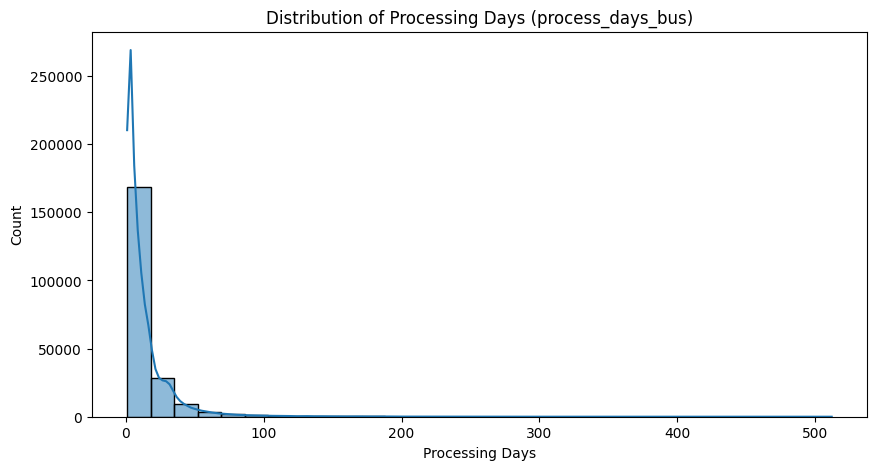

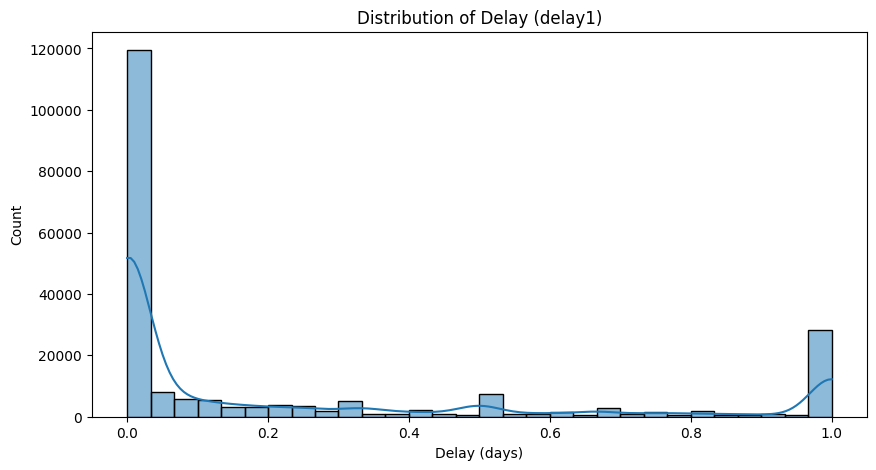

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of process_days_bus (processing time in days)
plt.figure(figsize=(10,5))
sns.histplot(df['process_days_bus'].dropna(), bins=30, kde=True)
plt.title('Distribution of Processing Days (process_days_bus)')
plt.xlabel('Processing Days')
plt.ylabel('Count')
plt.show()

# Distribution of delay1 (delay in days)
plt.figure(figsize=(10,5))
sns.histplot(df['delay1'].dropna(), bins=30, kde=True)
plt.title('Distribution of Delay (delay1)')
plt.xlabel('Delay (days)')
plt.ylabel('Count')
plt.show()


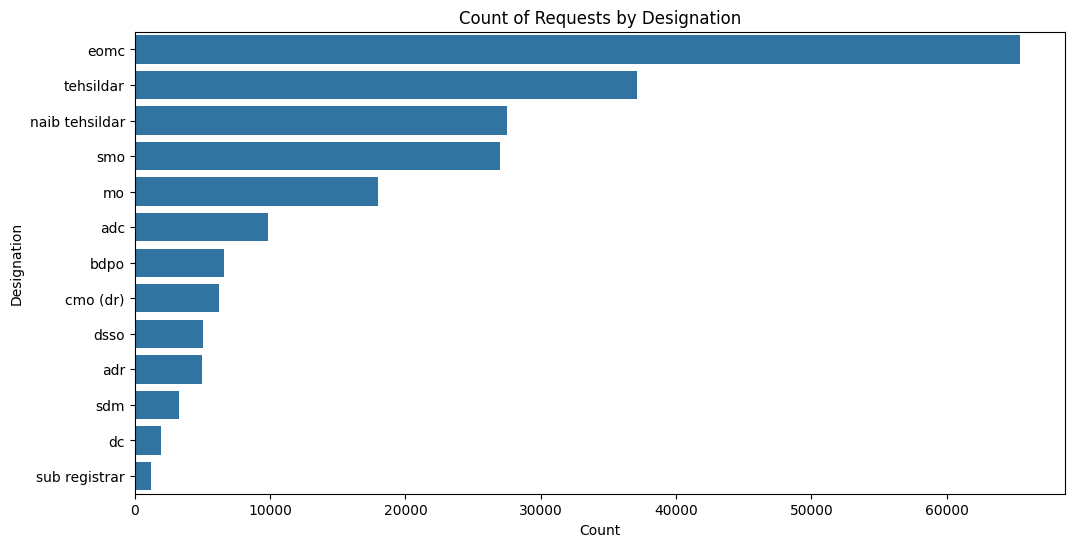

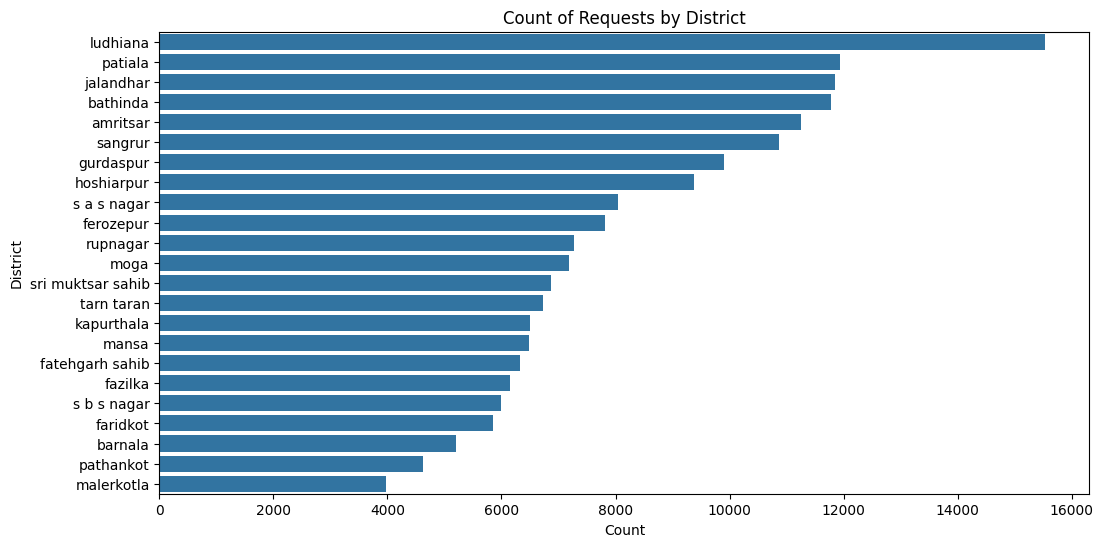

In [42]:
# Designation distribution
plt.figure(figsize=(12,6))
sns.countplot(y='desig_name', data=df, order=df['desig_name'].value_counts().index)
plt.title('Count of Requests by Designation')
plt.xlabel('Count')
plt.ylabel('Designation')
plt.show()

# District-wise count
plt.figure(figsize=(12,6))
sns.countplot(y='district_name', data=df, order=df['district_name'].value_counts().index)
plt.title('Count of Requests by District')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


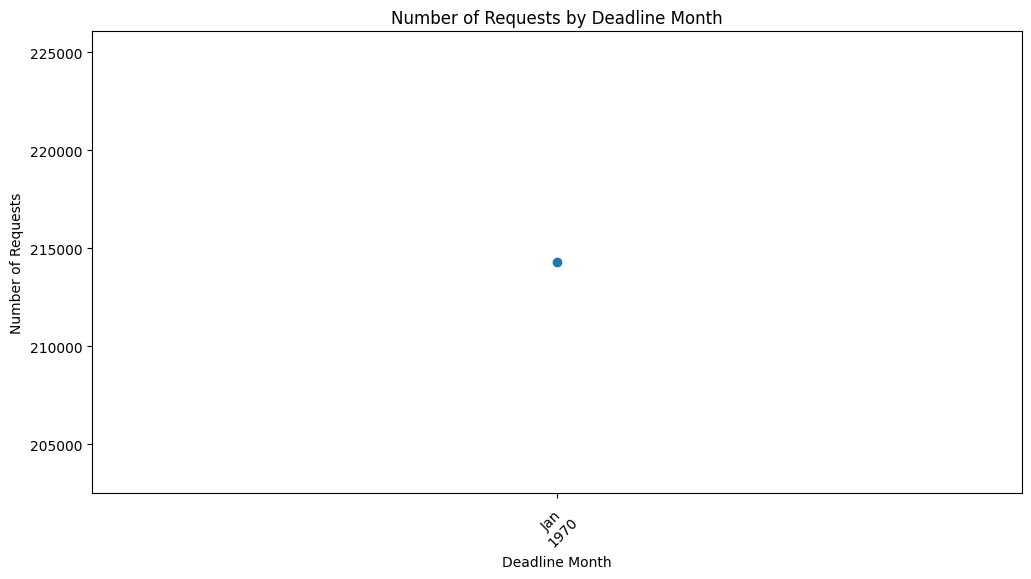

In [43]:
# Extract year-month from ta_deadline
df['deadline_month'] = df['ta_deadline'].dt.to_period('M')

monthly_counts = df.groupby('deadline_month').size()

plt.figure(figsize=(12,6))
monthly_counts.plot(kind='line', marker='o')
plt.title('Number of Requests by Deadline Month')
plt.xlabel('Deadline Month')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.show()


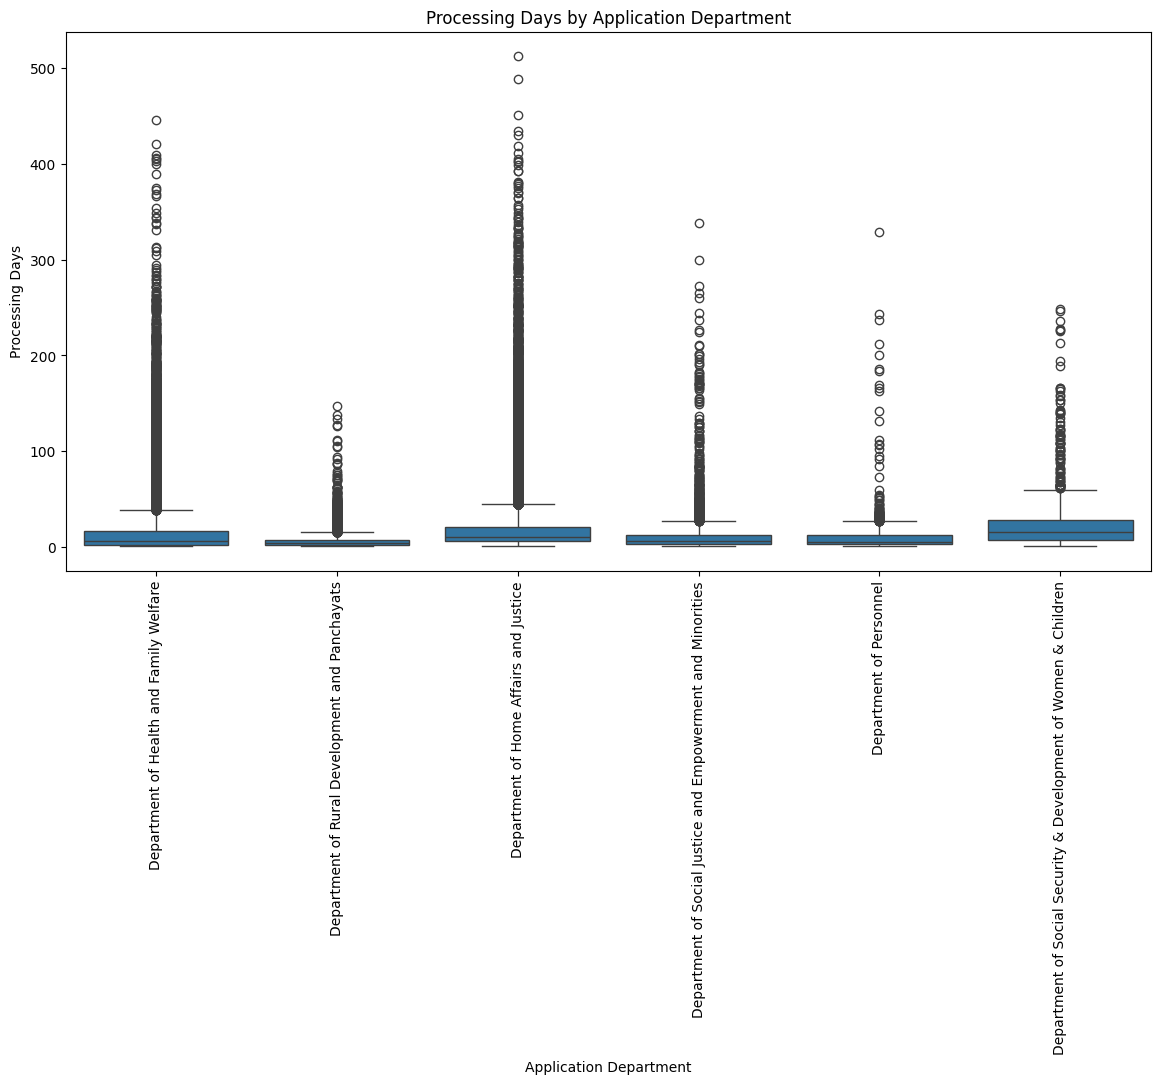

In [44]:
plt.figure(figsize=(14,7))
sns.boxplot(x='app_department_name', y='process_days_bus', data=df)
plt.xticks(rotation=90)
plt.title('Processing Days by Application Department')
plt.xlabel('Application Department')
plt.ylabel('Processing Days')
plt.show()


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average processing days per department
dept_stats = df.groupby('app_department_name').agg(
    avg_processing_days=('process_days_bus', 'mean'),
    delay_rate=('delay1', lambda x: (x > 0).mean()),        # proportion delayed
    sendback_rate=('sendback_yn', 'mean'),                 # proportion sent back
    rejection_rate=('reject', 'mean')                       # proportion rejected
).reset_index()

# Sort by average processing days descending for initial look
dept_stats_sorted = dept_stats.sort_values('avg_processing_days', ascending=False)


<ipython-input-46-f23457187730>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_stats_sorted, x='avg_processing_days', y='app_department_name', ax=axs[0, 0], palette='Blues_d')
<ipython-input-46-f23457187730>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_stats_sorted.sort_values('delay_rate', ascending=False), x='delay_rate', y='app_department_name', ax=axs[0, 1], palette='Reds_d')
<ipython-input-46-f23457187730>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_stats_sorted.sort_values('sendback_rate', ascen

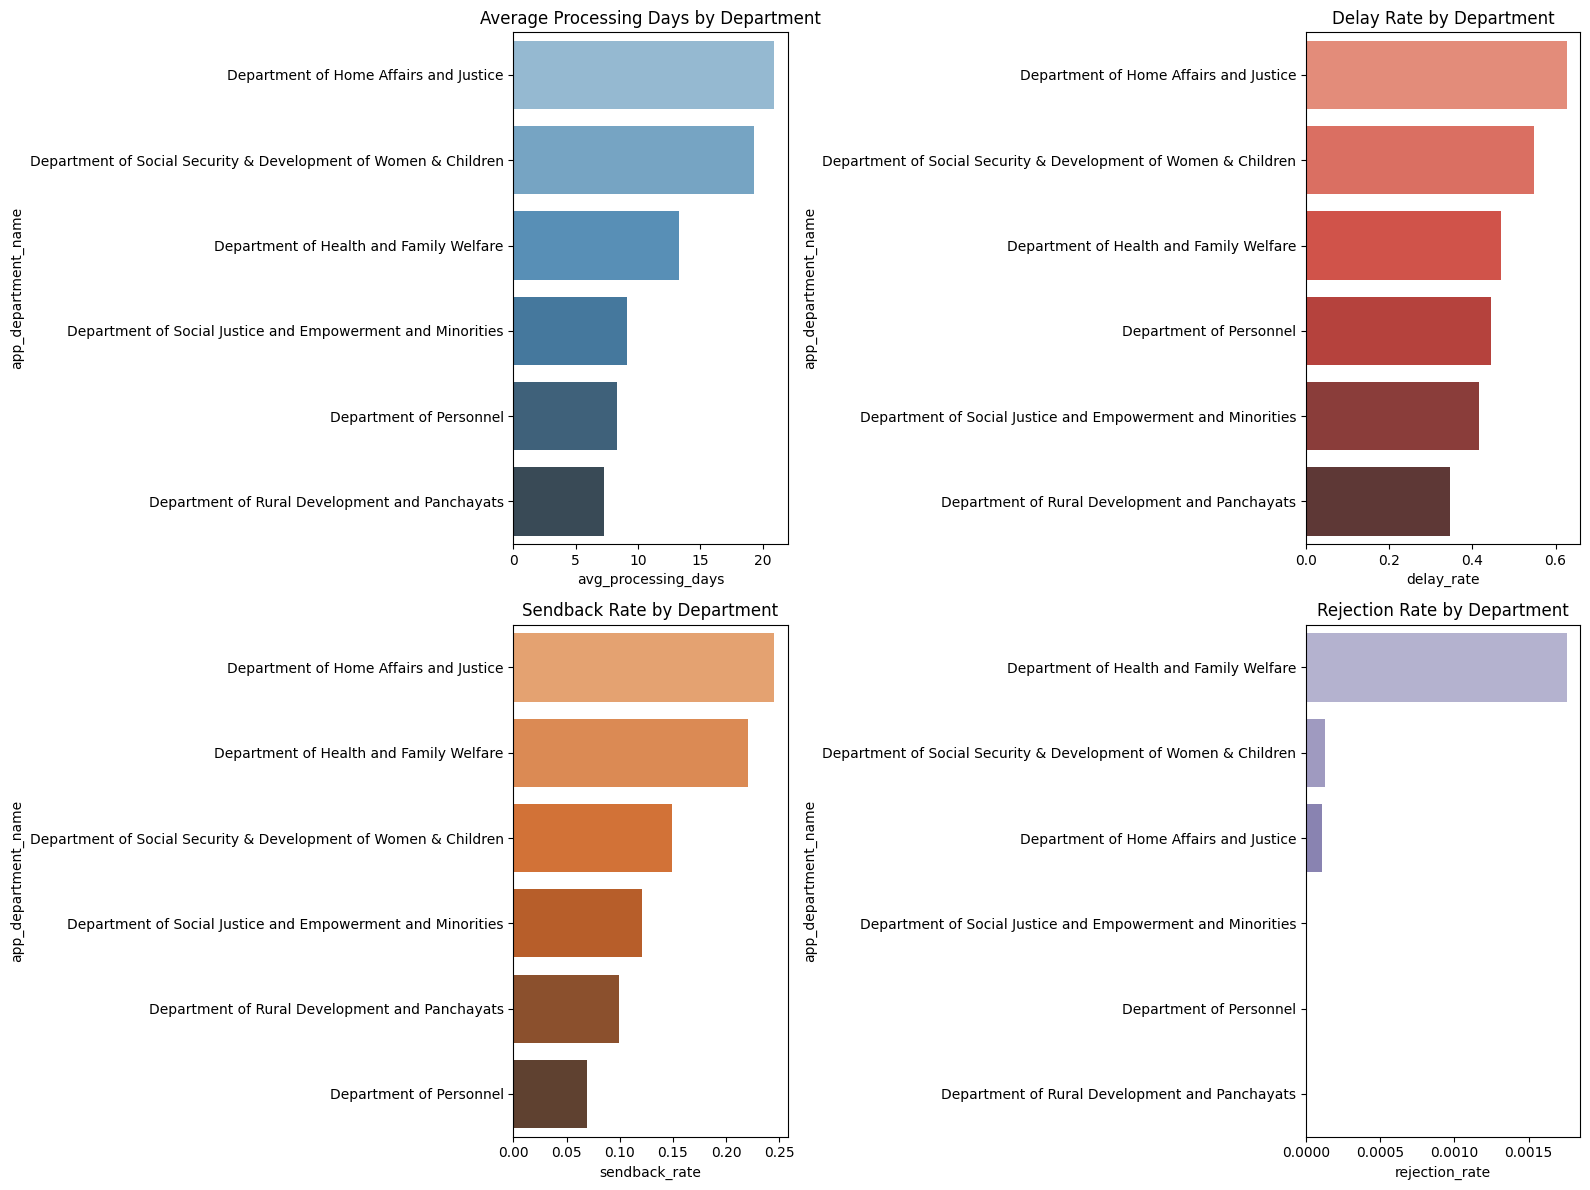

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

sns.barplot(data=dept_stats_sorted, x='avg_processing_days', y='app_department_name', ax=axs[0, 0], palette='Blues_d')
axs[0, 0].set_title('Average Processing Days by Department')

sns.barplot(data=dept_stats_sorted.sort_values('delay_rate', ascending=False), x='delay_rate', y='app_department_name', ax=axs[0, 1], palette='Reds_d')
axs[0, 1].set_title('Delay Rate by Department')

sns.barplot(data=dept_stats_sorted.sort_values('sendback_rate', ascending=False), x='sendback_rate', y='app_department_name', ax=axs[1, 0], palette='Oranges_d')
axs[1, 0].set_title('Sendback Rate by Department')

sns.barplot(data=dept_stats_sorted.sort_values('rejection_rate', ascending=False), x='rejection_rate', y='app_department_name', ax=axs[1, 1], palette='Purples_d')
axs[1, 1].set_title('Rejection Rate by Department')

plt.tight_layout()
plt.show()


In [47]:
service_stats = df.groupby('service_name').agg(
    avg_processing_days=('process_days_bus', 'mean'),
    delay_rate=('delay1', lambda x: (x > 0).mean())
).reset_index()

service_stats_sorted = service_stats.sort_values('delay_rate', ascending=False)


<ipython-input-48-30704042f2b9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=service_stats_sorted, x='delay_rate', y='service_name', ax=axs[0], palette='Reds_d')
<ipython-input-48-30704042f2b9>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=service_stats.sort_values('avg_processing_days', ascending=False), x='avg_processing_days', y='service_name', ax=axs[1], palette='Blues_d')
<ipython-input-48-30704042f2b9>:13: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


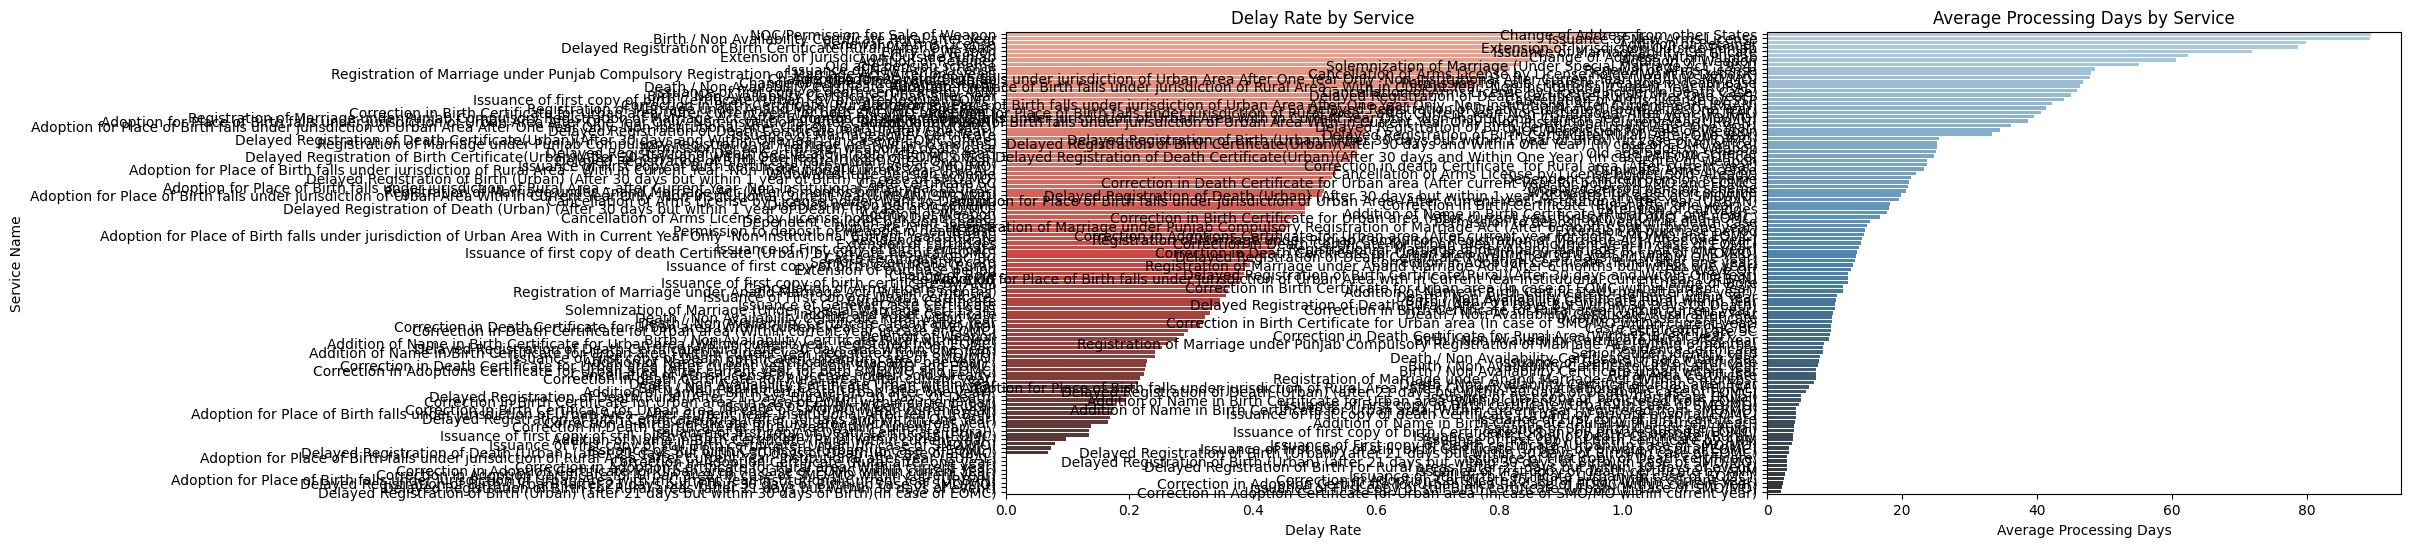

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=service_stats_sorted, x='delay_rate', y='service_name', ax=axs[0], palette='Reds_d')
axs[0].set_title('Delay Rate by Service')
axs[0].set_xlabel('Delay Rate')
axs[0].set_ylabel('Service Name')

sns.barplot(data=service_stats.sort_values('avg_processing_days', ascending=False), x='avg_processing_days', y='service_name', ax=axs[1], palette='Blues_d')
axs[1].set_title('Average Processing Days by Service')
axs[1].set_xlabel('Average Processing Days')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()


In [53]:
desig_stats = df.groupby('desig_name').agg(
    avg_processing_days=('process_days_bus', 'mean'),
    delay_rate=('delay1', lambda x: (x > 0).mean())
).reset_index()

desig_stats_sorted = desig_stats.sort_values('delay_rate', ascending=False)


<ipython-input-54-f820bcd3a48e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=desig_stats_sorted, x='delay_rate', y='desig_name', ax=axs[0], palette='Reds_d')
<ipython-input-54-f820bcd3a48e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=desig_stats.sort_values('avg_processing_days', ascending=False), x='avg_processing_days', y='desig_name', ax=axs[1], palette='Blues_d')


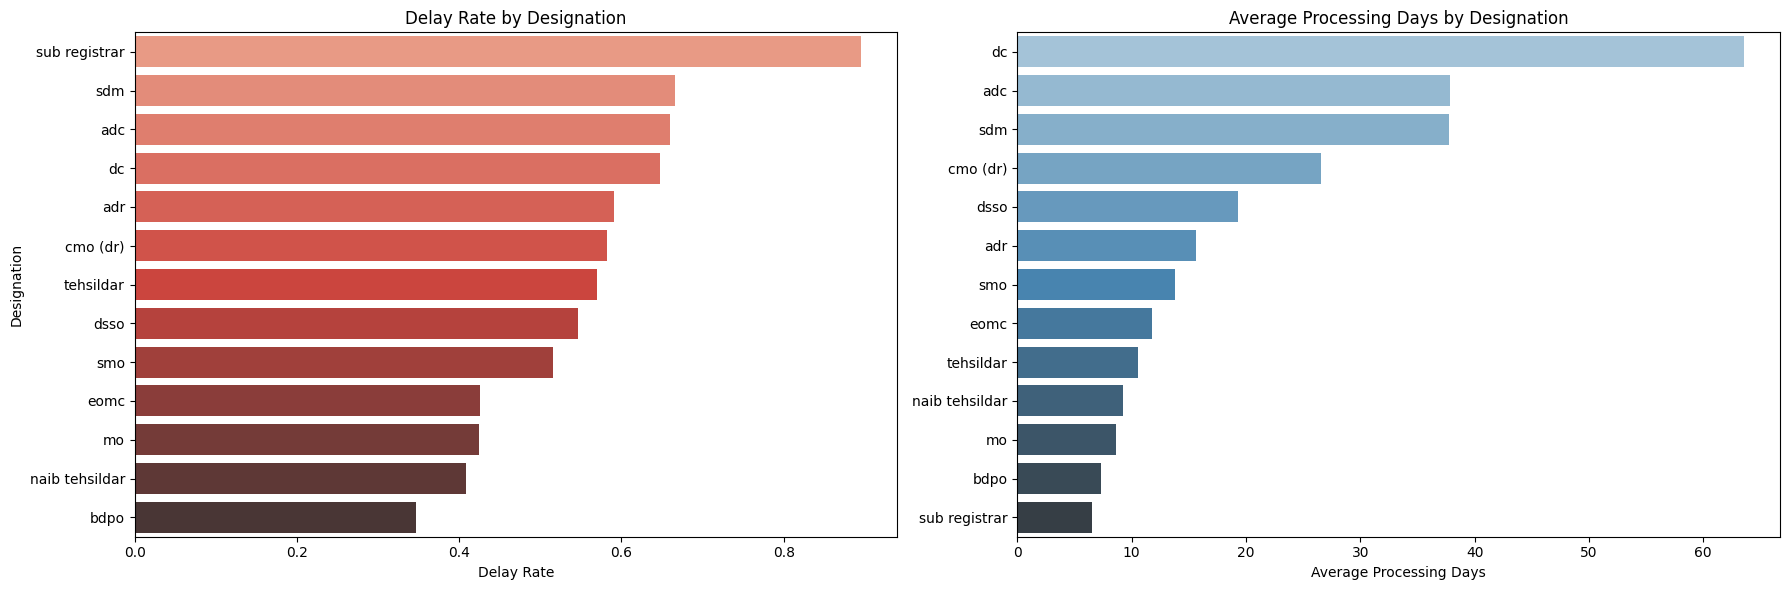

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

sns.barplot(data=desig_stats_sorted, x='delay_rate', y='desig_name', ax=axs[0], palette='Reds_d')
axs[0].set_title('Delay Rate by Designation')
axs[0].set_xlabel('Delay Rate')
axs[0].set_ylabel('Designation')

sns.barplot(data=desig_stats.sort_values('avg_processing_days', ascending=False), x='avg_processing_days', y='desig_name', ax=axs[1], palette='Blues_d')
axs[1].set_title('Average Processing Days by Designation')
axs[1].set_xlabel('Average Processing Days')
axs[1].set_ylabel('')

plt.tight_layout()
plt.show()


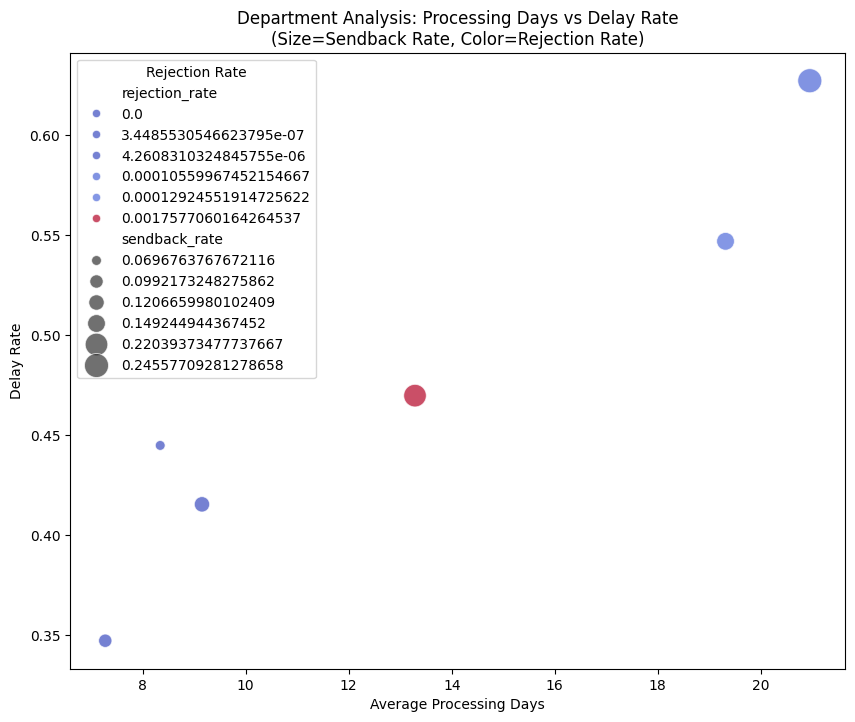

In [55]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=dept_stats, x='avg_processing_days', y='delay_rate', size='sendback_rate', hue='rejection_rate', palette='coolwarm', sizes=(50, 300), alpha=0.7)
plt.title('Department Analysis: Processing Days vs Delay Rate\n(Size=Sendback Rate, Color=Rejection Rate)')
plt.xlabel('Average Processing Days')
plt.ylabel('Delay Rate')
plt.legend(title='Rejection Rate')
plt.show()


In [56]:
import scipy.stats as stats

# Extract groups for ANOVA
groups = [group['process_days_bus'].dropna() for name, group in df.groupby('app_department_name')]

# One-way ANOVA test
f_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.3f}")


ANOVA F-statistic: 1468.602, p-value: 0.000


In [57]:
from scipy.stats import chi2_contingency

# Create contingency tables for each binary variable by department

def chi2_test_by_dept(column):
    contingency_table = pd.crosstab(df['app_department_name'], df[column])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Chi-square test for {column}: chi2={chi2:.2f}, p-value={p:.4f}")

chi2_test_by_dept('delay1')         # delays (0 or >0)
chi2_test_by_dept('sendback_yn')    # sendback (0 or 1)
chi2_test_by_dept('reject')          # rejection (0 or 1)


Chi-square test for delay1: chi2=79777.99, p-value=0.0000
Chi-square test for sendback_yn: chi2=84368.63, p-value=0.0000
Chi-square test for reject: chi2=804.27, p-value=0.0003


In [58]:
# ANOVA for processing days by service
groups_service = [group['process_days_bus'].dropna() for name, group in df.groupby('service_name')]
f_stat_svc, p_val_svc = stats.f_oneway(*groups_service)
print(f"Service ANOVA: F={f_stat_svc:.3f}, p={p_val_svc:.3f}")

# Chi-square for delay by service
chi2_test_by_dept('delay1')  # Reuse function by replacing df with service instead of department

# Modify function for arbitrary categorical variable:
def chi2_test_by_cat(column, cat_col):
    contingency_table = pd.crosstab(df[cat_col], df[column])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    print(f"Chi-square test for {column} by {cat_col}: chi2={chi2:.2f}, p-value={p:.4f}")

chi2_test_by_cat('delay1', 'service_name')
chi2_test_by_cat('delay1', 'desig_name')
chi2_test_by_cat('delay1', 'app_department_name')


Service ANOVA: F=1225.414, p=0.000
Chi-square test for delay1: chi2=79777.99, p-value=0.0000
Chi-square test for delay1 by service_name: chi2=627165.84, p-value=1.0000
Chi-square test for delay1 by desig_name: chi2=180342.92, p-value=0.0000
Chi-square test for delay1 by app_department_name: chi2=79777.99, p-value=0.0000


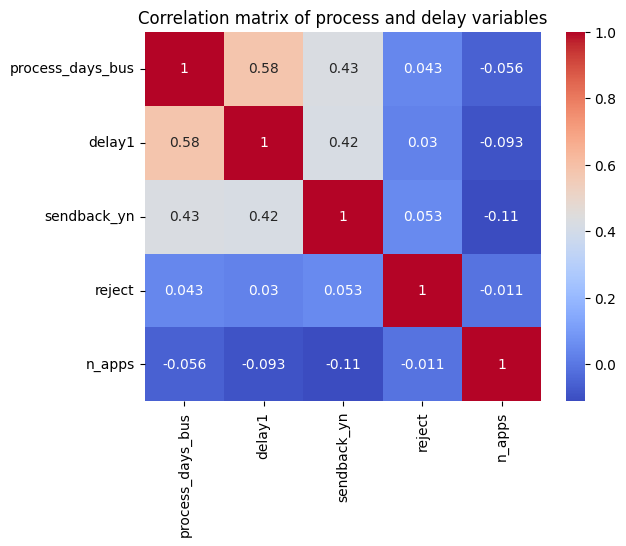

In [59]:
corr_vars = ['process_days_bus', 'delay1', 'sendback_yn', 'reject', 'n_apps']
corr = df[corr_vars].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation matrix of process and delay variables')
plt.show()


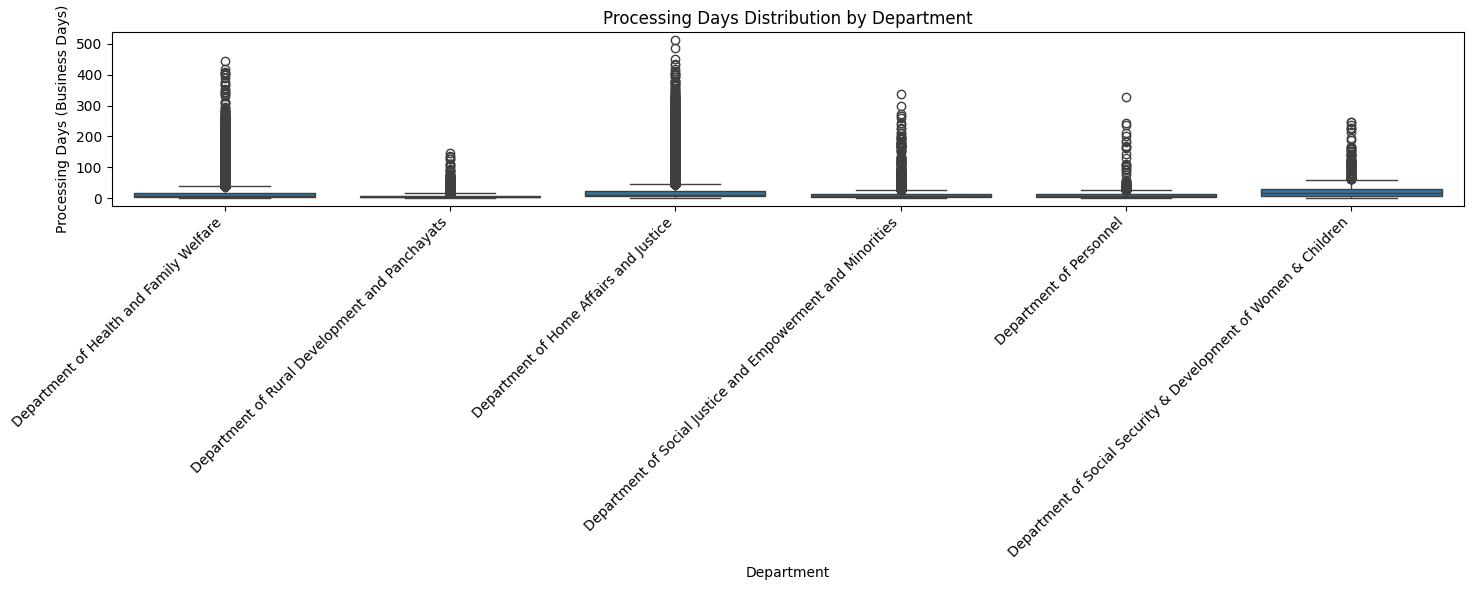

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='app_department_name', y='process_days_bus')
plt.xticks(rotation=45, ha='right')
plt.title('Processing Days Distribution by Department')
plt.ylabel('Processing Days (Business Days)')
plt.xlabel('Department')
plt.tight_layout()
plt.show()


In [61]:
# Check value counts for categorical columns
print("Value counts for app_department_name:")
print(df['app_department_name'].value_counts().sort_index())
print("\nValue counts for service_name:")
print(df['service_name'].value_counts().sort_index())
print("\nValue counts for desig_name:")
print(df['desig_name'].value_counts().sort_index())

# You can also check the number of unique values
print("\nNumber of unique app_department_name:", df['app_department_name'].nunique())
print("Number of unique service_name:", df['service_name'].nunique())
print("Number of unique desig_name:", df['desig_name'].nunique())

# Based on the value counts, you might consider:
# 1. Removing categories with very few counts (e.g., count < 5 or 10)
# 2. Grouping low-count categories into a single 'Other' category

# Example of filtering out rows with low-frequency categories (adjust threshold as needed)
# For example, filter out departments with less than 10 observations
# dept_counts = df['app_department_name'].value_counts()
# departments_to_keep = dept_counts[dept_counts >= 10].index
# df_filtered = df[df['app_department_name'].isin(departments_to_keep)].copy()

# Repeat for service_name and desig_name if necessary

# Then, rebuild the model using df_filtered
# y_filtered, X_filtered = patsy.dmatrices(formula, data=df_filtered, return_type='dataframe')
# logit_model_filtered = sm.Logit(y_filtered, X_filtered).fit()
# print(logit_model_filtered.summary())

# Alternatively, try fitting the model with one categorical variable at a time
# formula_dept = 'delay_binary ~ C(app_department_name)'
# y_dept, X_dept = patsy.dmatrices(formula_dept, data=df, return_type='dataframe')
# logit_model_dept = sm.Logit(y_dept, X_dept).fit()
# print(logit_model_dept.summary())

# formula_service = 'delay_binary ~ C(service_name)'
# y_service, X_service = patsy.dmatrices(formula_service, data=df, return_type='dataframe')
# logit_model_service = sm.Logit(y_service, X_service).fit()
# print(logit_model_service.summary())

# formula_desig = 'delay_binary ~ C(desig_name)'
# y_desig, X_desig = patsy.dmatrices(formula_desig, data=df, return_type='dataframe')
# logit_model_desig = sm.Logit(y_desig, X_desig).fit()
# print(logit_model_desig.summary())

# If individual models work, the issue is likely with the combination or specific low-frequency combinations.
# Filtering low-frequency categories in the original df before creating dmatrices is often the most effective solution.

Value counts for app_department_name:
app_department_name
Department of Health and Family Welfare                            126138
Department of Home Affairs and Justice                              38405
Department of Personnel                                              8708
Department of Rural Development and Panchayats                       6616
Department of Social Justice and Empowerment and Minorities         29337
Department of Social Security & Development of Women & Children      5066
Name: count, dtype: int64

Value counts for service_name:
service_name
Addition of Name in Birth Certificate (Rural after one Year)                                           983
Addition of Name in Birth Certificate (Rural within current year )                                     801
Addition of Name in Birth Certificate for Urban area (Within current year, registered from EOMC)      2645
Addition of Name in Birth Certificate for Urban area (Within current year, registered from SMO/MO)    2425

<ipython-input-63-6b463bd4ddc0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delay_rate_by_dept.index, y=delay_rate_by_dept.values, palette='Reds_r')


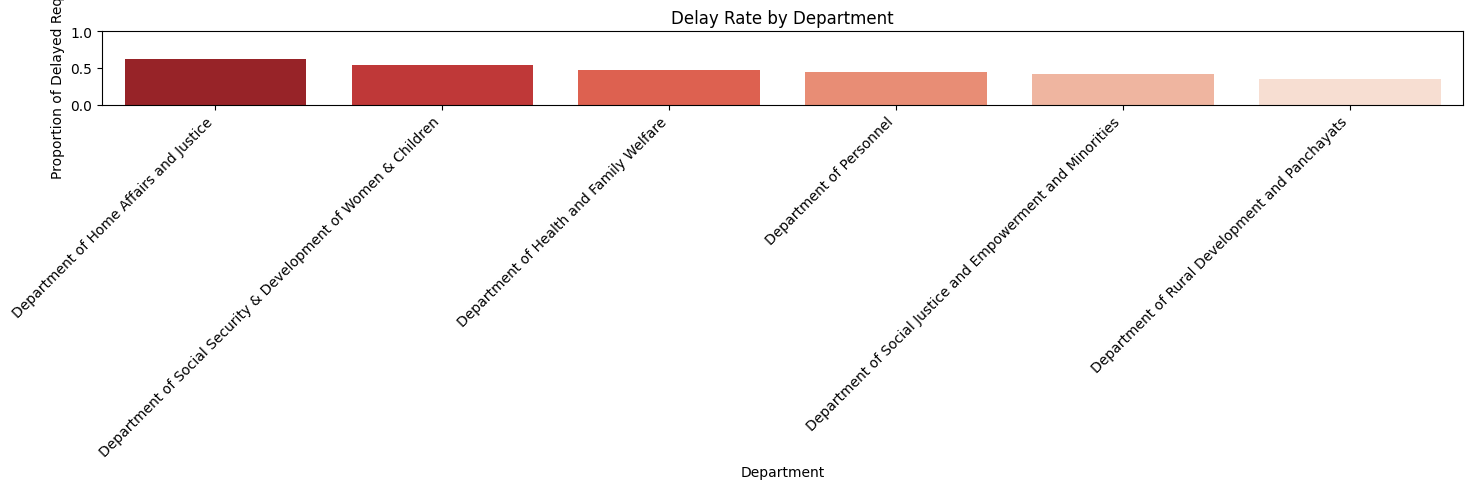

In [63]:
delay_rate_by_dept = df.groupby('app_department_name')['delay1'].apply(lambda x: (x > 0).mean()).sort_values(ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=delay_rate_by_dept.index, y=delay_rate_by_dept.values, palette='Reds_r')
plt.xticks(rotation=45, ha='right')
plt.title('Delay Rate by Department')
plt.ylabel('Proportion of Delayed Requests')
plt.xlabel('Department')
plt.ylim(0,1)
plt.tight_layout()
plt.show()


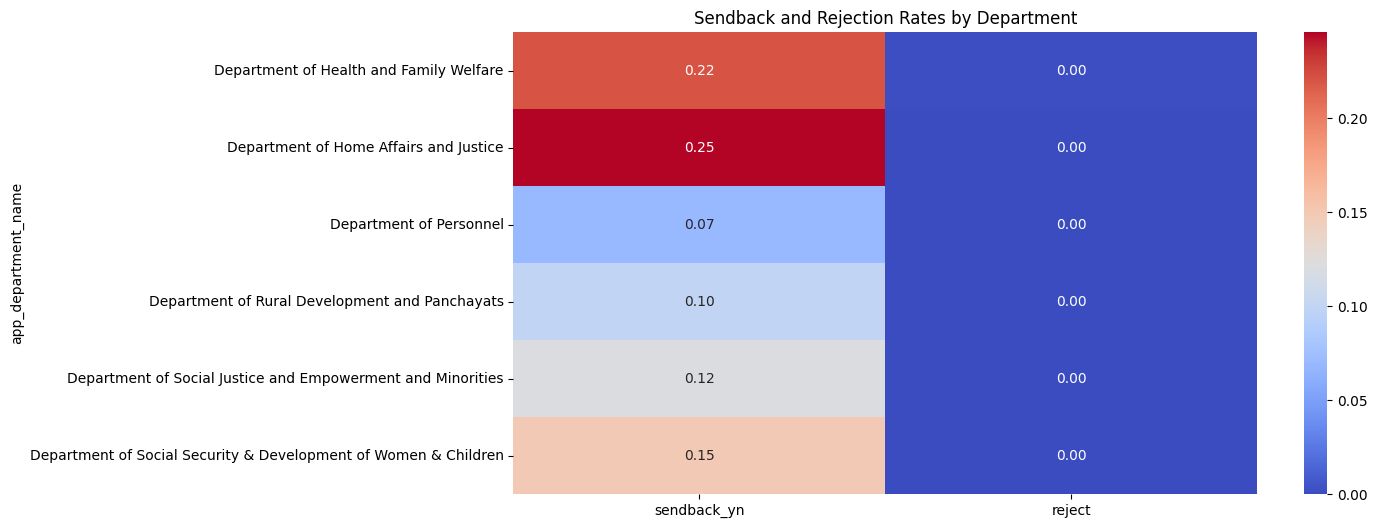

In [64]:
rates = df.groupby('app_department_name')[['sendback_yn', 'reject']].mean()

plt.figure(figsize=(12,6))
sns.heatmap(rates, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Sendback and Rejection Rates by Department')
plt.show()


<ipython-input-65-1724a2458232>:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


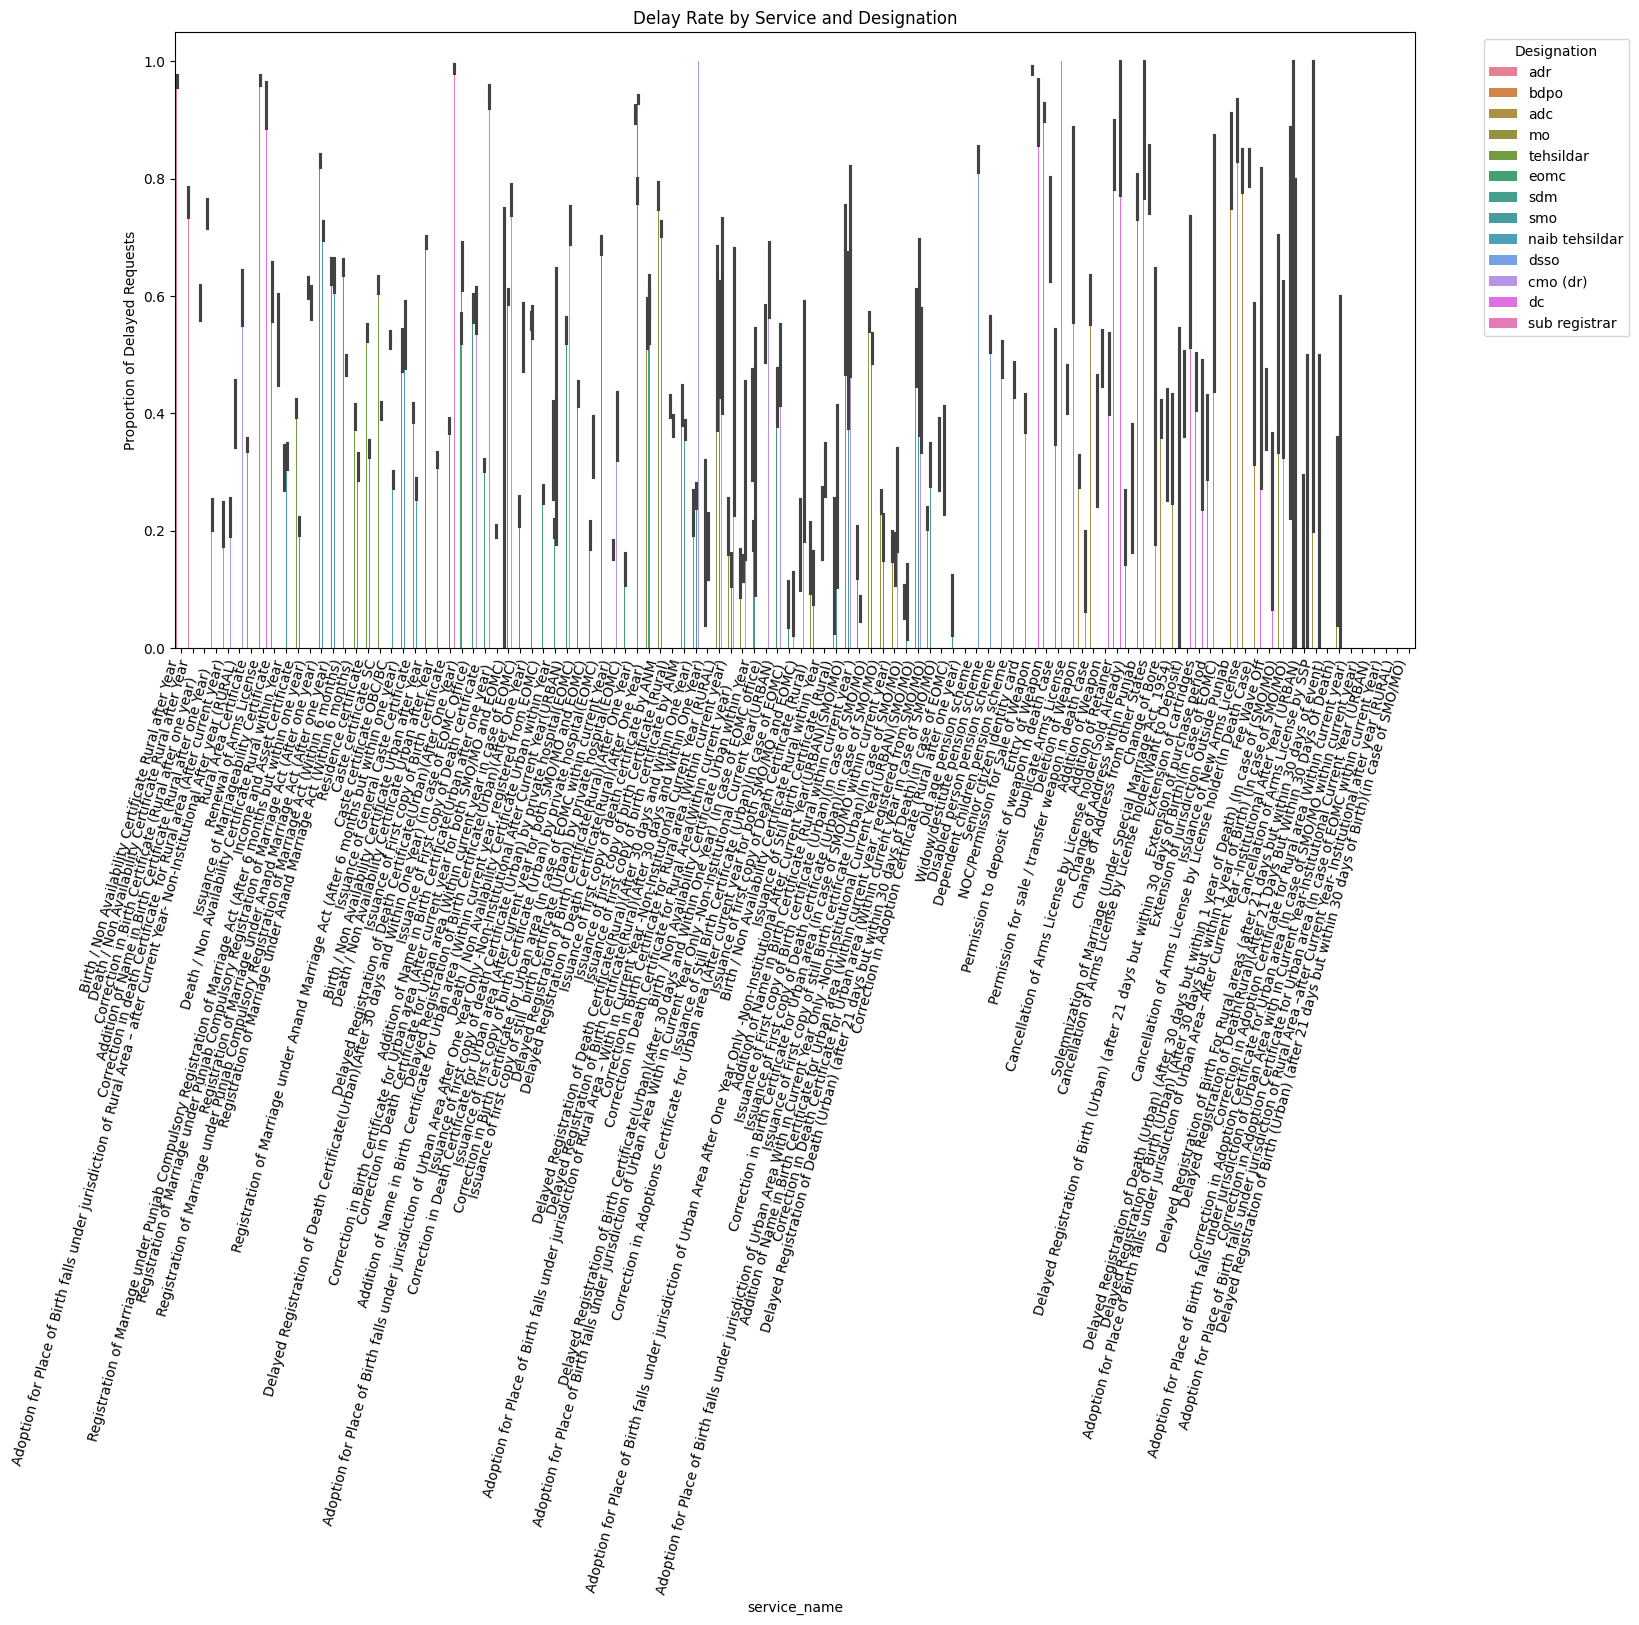

In [65]:
plt.figure(figsize=(16,8))
sns.barplot(data=df, x='service_name', y=(df['delay1'] > 0).astype(int), hue='desig_name')
plt.xticks(rotation=75, ha='right')
plt.ylabel('Proportion of Delayed Requests')
plt.title('Delay Rate by Service and Designation')
plt.legend(title='Designation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<ipython-input-66-83c8247233c9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='desig_name', y='process_days_bus', inner='quartile', palette='Set3')


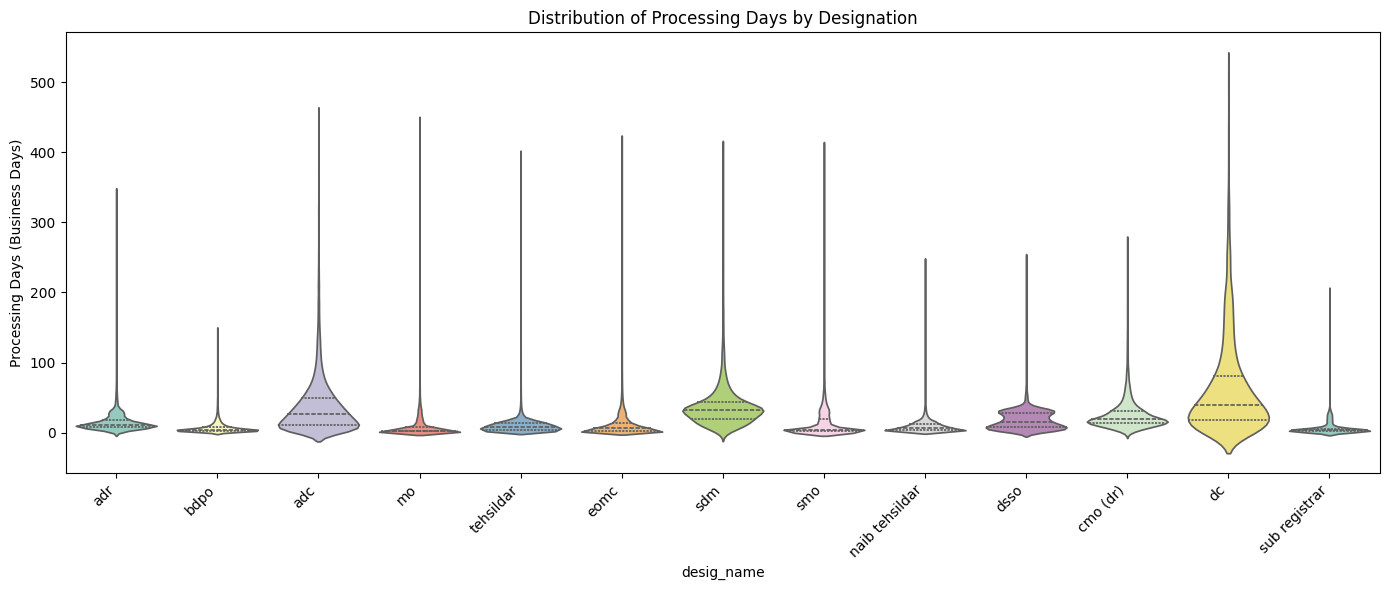

In [66]:
plt.figure(figsize=(14,6))
sns.violinplot(data=df, x='desig_name', y='process_days_bus', inner='quartile', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Processing Days by Designation')
plt.ylabel('Processing Days (Business Days)')
plt.tight_layout()
plt.show()


<ipython-input-67-36ab16abda1e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


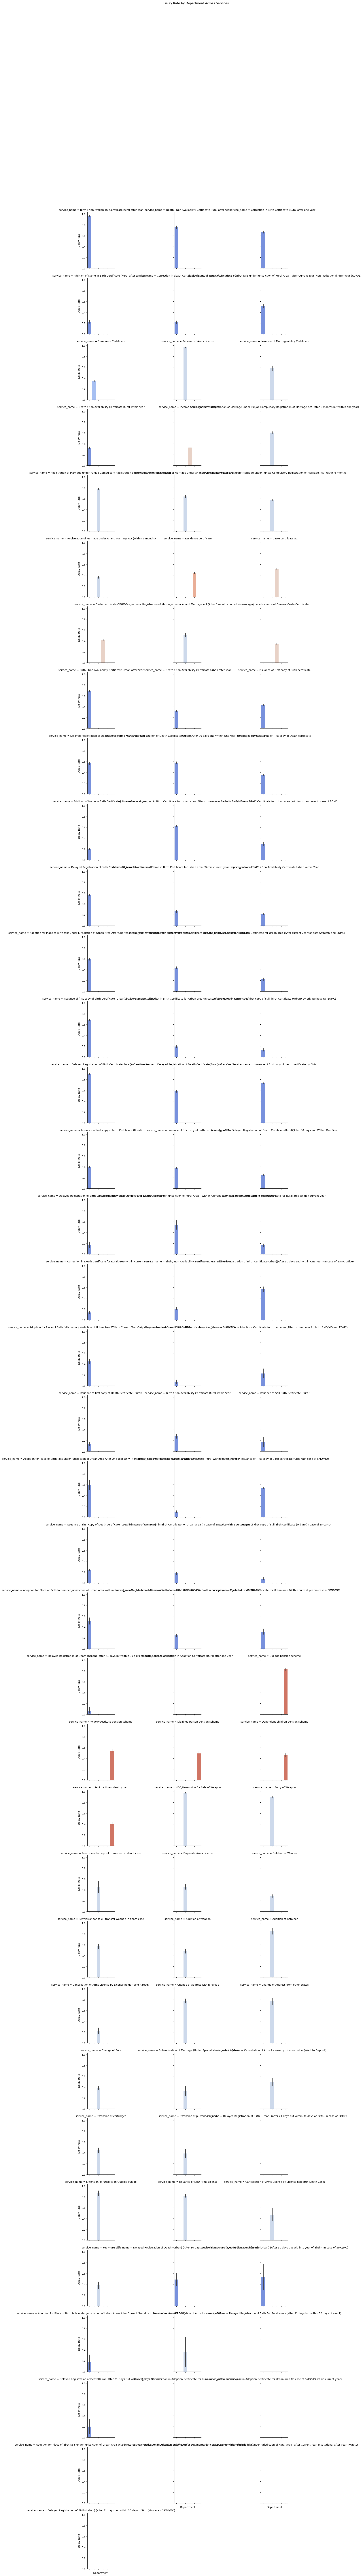

In [67]:
g = sns.catplot(
    data=df,
    x='app_department_name', y=(df['delay1'] > 0).astype(int),
    col='service_name', kind='bar', col_wrap=3,
    height=4, aspect=1.2,
    palette='coolwarm'
)

g.set_xticklabels(rotation=45, ha='right')
g.set_axis_labels('Department', 'Delay Rate')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Delay Rate by Department Across Services')
plt.show()


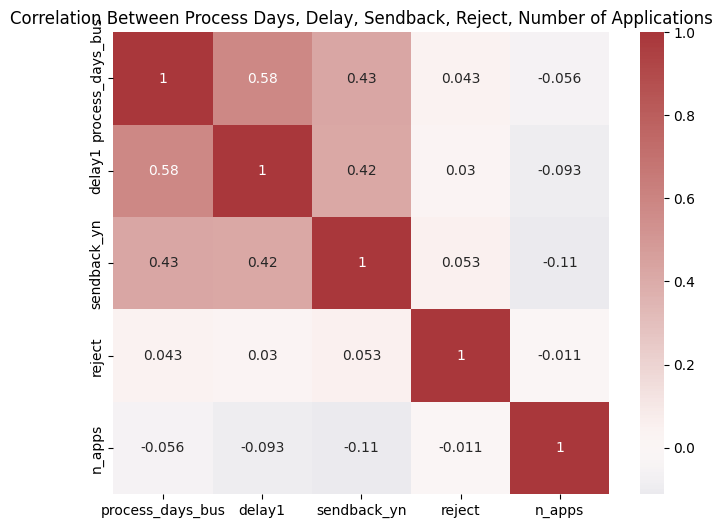

In [68]:
corr_vars = ['process_days_bus', 'delay1', 'sendback_yn', 'reject', 'n_apps']
corr = df[corr_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='vlag', center=0)
plt.title('Correlation Between Process Days, Delay, Sendback, Reject, Number of Applications')
plt.show()


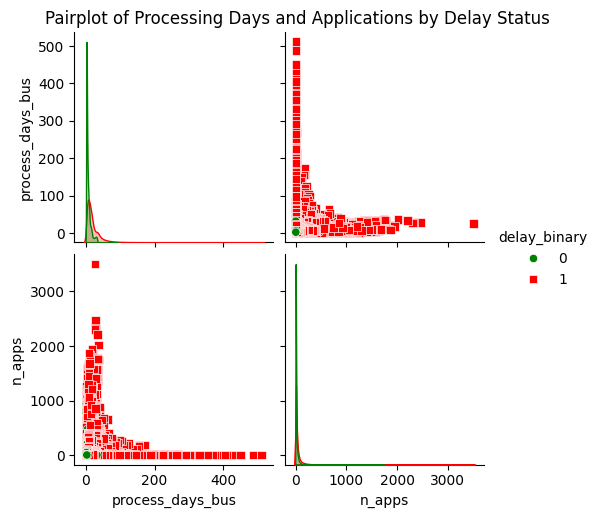

In [69]:
df['delay_binary'] = (df['delay1'] > 0).astype(int)

sns.pairplot(
    df,
    vars=['process_days_bus', 'n_apps'],
    hue='delay_binary',
    palette={0:'green', 1:'red'},
    diag_kind='kde',
    markers=["o", "s"]
)
plt.suptitle('Pairplot of Processing Days and Applications by Delay Status', y=1.02)
plt.show()


In [70]:
# Check missing values
print(df.isnull().sum())

# Simple approach: drop rows with missing critical columns or fill missing values
df = df.dropna(subset=['process_days_bus', 'delay1', 'sendback_yn', 'reject', 'app_department_name', 'service_name', 'desig_name'])

# For non-critical missing values, fill with mode or median as appropriate
df['n_apps'].fillna(df['n_apps'].median(), inplace=True)


masked_userid              0
desig_name                 0
serviceid                  0
service_name               0
ta_deadline                0
app_department_name        0
district_name          26781
bw_created_on              0
n_apps                     0
process_days_bus           0
delay1                     0
sendback_yn             2094
reject                     0
deadline_month             0
delay_binary               0
dtype: int64


<ipython-input-70-694348866cb0>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['n_apps'].fillna(df['n_apps'].median(), inplace=True)
<ipython-input-70-694348866cb0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['n_apps'].fillna(df['n_apps'].median(), inplace=True)


In [72]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['app_department_name', 'service_name', 'desig_name', 'district_name']

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df['delay_binary'] = (df['delay1'] > 0).astype(int)
df['sendback_binary'] = df['sendback_yn'].astype(int)
df['reject_binary'] = df['reject'].astype(int)


<ipython-input-72-c3aa833b0742>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-72-c3aa833b0742>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-72-c3aa833b0742>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [73]:
df['delay_binary'] = (df['delay1'] > 0).astype(int)
df['sendback_binary'] = df['sendback_yn'].astype(int)
df['reject_binary'] = df['reject'].astype(int)


<ipython-input-73-c558ef8a88f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['delay_binary'] = (df['delay1'] > 0).astype(int)
<ipython-input-73-c558ef8a88f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sendback_binary'] = df['sendback_yn'].astype(int)
<ipython-input-73-c558ef8a88f5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [74]:
features = ['app_department_name', 'service_name', 'desig_name', 'district_name', 'n_apps', 'process_days_bus']
X = df[features]


In [75]:
from sklearn.model_selection import train_test_split

y_delay = df['delay_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y_delay, test_size=0.2, random_state=42, stratify=y_delay)


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

model_lr = LogisticRegression(max_iter=1000)
model_lr.fit(X_train, y_train)

y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


              precision    recall  f1-score   support

           0       0.75      0.84      0.79     21592
           1       0.81      0.70      0.75     20844

    accuracy                           0.77     42436
   macro avg       0.78      0.77      0.77     42436
weighted avg       0.78      0.77      0.77     42436

ROC AUC Score: 0.8606937456988306


In [77]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_rf))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_rf))


              precision    recall  f1-score   support

           0       0.88      0.88      0.88     21592
           1       0.88      0.88      0.88     20844

    accuracy                           0.88     42436
   macro avg       0.88      0.88      0.88     42436
weighted avg       0.88      0.88      0.88     42436

ROC AUC Score: 0.9599288776595438


In [78]:
import xgboost as xgb

model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xgb.fit(X_train, y_train)

y_pred_xgb = model_xgb.predict(X_test)
y_prob_xgb = model_xgb.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred_xgb))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:23:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.90      0.89      0.89     21592
           1       0.89      0.89      0.89     20844

    accuracy                           0.89     42436
   macro avg       0.89      0.89      0.89     42436
weighted avg       0.89      0.89      0.89     42436

ROC AUC Score: 0.9688114868588542


<ipython-input-79-5439d1eb0230>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')


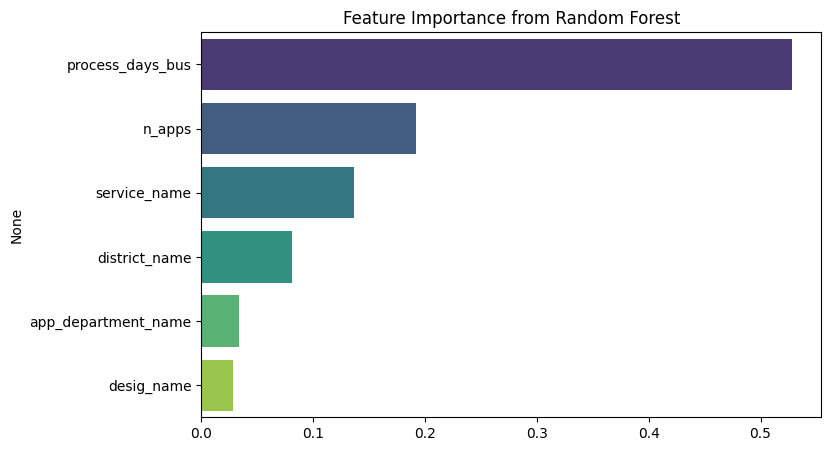

In [79]:
importances = model_rf.feature_importances_
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp.values, y=feat_imp.index, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.show()


In [80]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='roc_auc')
grid_rf.fit(X_train, y_train)

print("Best Params:", grid_rf.best_params_)
print("Best Score:", grid_rf.best_score_)


Best Params: {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.9651171248932032


In [81]:
# Ensure bw_created_on is datetime
df['bw_created_on'] = pd.to_datetime(df['bw_created_on'], errors='coerce')

# Drop rows with missing critical dates
df = df.dropna(subset=['bw_created_on', 'process_days_bus', 'delay1', 'sendback_yn', 'reject', 'service_name', 'ta_deadline'])

# Convert ta_deadline to datetime if needed
df['ta_deadline'] = pd.to_datetime(df['ta_deadline'], errors='coerce')

# Encoding categorical columns including service_name
from sklearn.preprocessing import LabelEncoder
label_cols = ['service_name', 'app_department_name', 'desig_name', 'district_name']

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


<ipython-input-81-84a41fbfd42e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bw_created_on'] = pd.to_datetime(df['bw_created_on'], errors='coerce')


In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Convert to datetime
df['bw_created_on'] = pd.to_datetime(df['bw_created_on'], errors='coerce')
df['ta_deadline'] = pd.to_datetime(df['ta_deadline'], errors='coerce')

# Drop rows with missing key info
df = df.dropna(subset=['bw_created_on', 'process_days_bus', 'delay1', 'sendback_yn', 'reject', 'service_name', 'ta_deadline'])

# Encode categorical columns
label_cols = ['service_name', 'app_department_name', 'desig_name', 'district_name']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [84]:
df['met_deadline'] = df['process_days_bus'] <= (df['ta_deadline'].dt.days)

# Compare distribution of processing days vs deadline by service
plt.figure(figsize=(14,7))
sns.boxplot(x='service_name', y='process_days_bus', data=df)
plt.xticks(rotation=90)
plt.title('Processing Days Distribution by Service')
plt.show()

# Deadline met vs missed rate by service
deadline_summary = df.groupby('service_name')['met_deadline'].mean().reset_index()
deadline_summary['met_deadline'] = deadline_summary['met_deadline'] * 100  # percentage

plt.figure(figsize=(14,6))
sns.barplot(x='service_name', y='met_deadline', data=deadline_summary)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Applications Meeting Deadline')
plt.title('Deadline Adherence by Service')
plt.show()


AttributeError: 'DatetimeProperties' object has no attribute 'days'

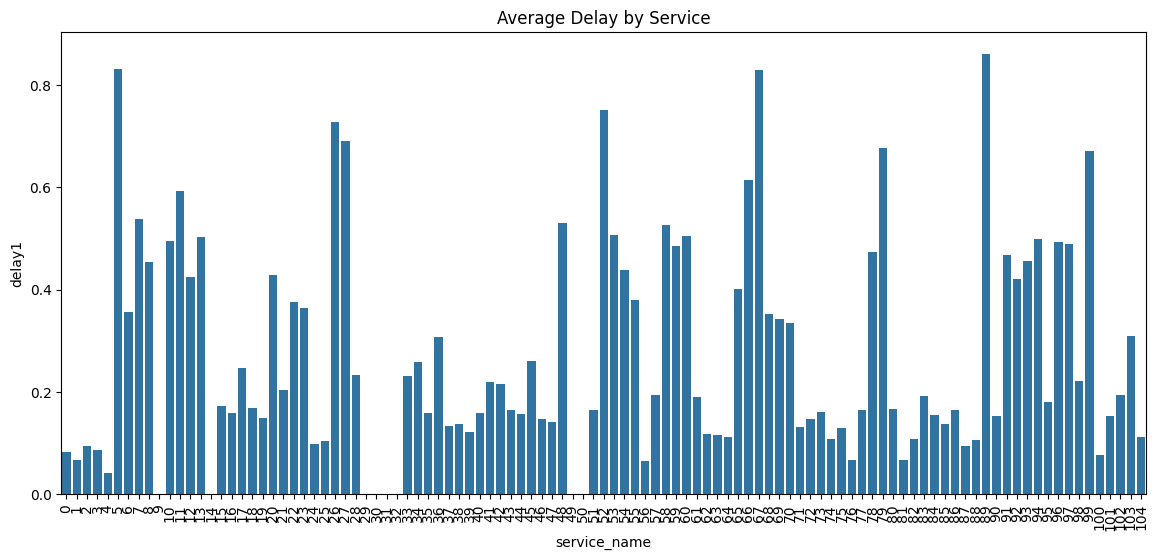

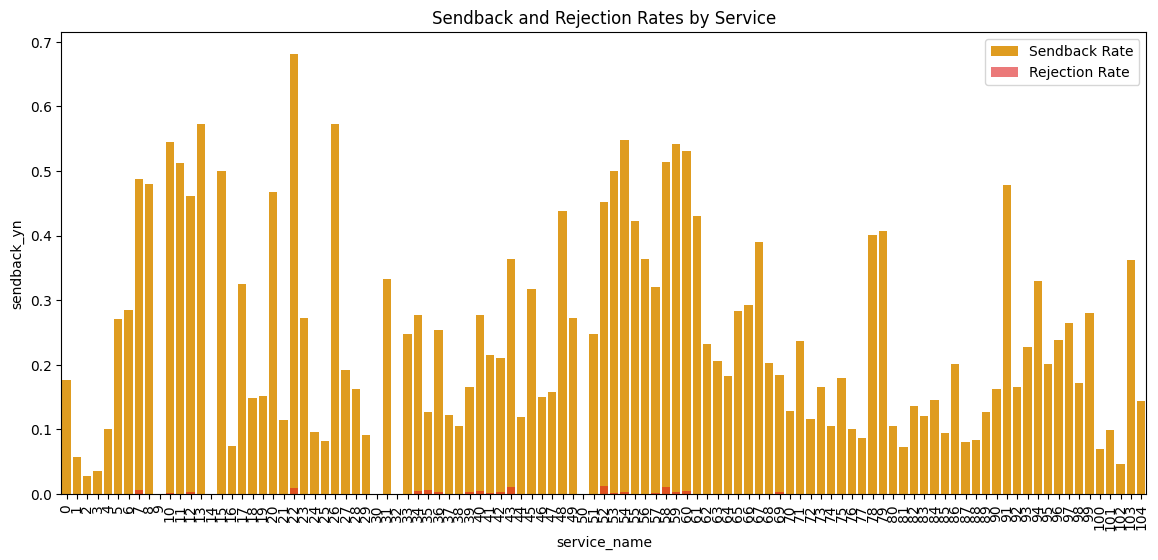

In [85]:
# Average delay by service and department
service_delay = df.groupby('service_name')['delay1'].mean().reset_index()
dept_delay = df.groupby('app_department_name')['delay1'].mean().reset_index()

# Sendback and rejection rates by service
service_sendback_reject = df.groupby('service_name').agg({
    'sendback_yn': 'mean',
    'reject': 'mean'
}).reset_index()

# Plot delays by service
plt.figure(figsize=(14,6))
sns.barplot(x='service_name', y='delay1', data=service_delay)
plt.xticks(rotation=90)
plt.title('Average Delay by Service')
plt.show()

# Plot sendback and rejection rates by service
plt.figure(figsize=(14,6))
sns.barplot(x='service_name', y='sendback_yn', data=service_sendback_reject, color='orange', label='Sendback Rate')
sns.barplot(x='service_name', y='reject', data=service_sendback_reject, color='red', alpha=0.6, label='Rejection Rate')
plt.xticks(rotation=90)
plt.legend()
plt.title('Sendback and Rejection Rates by Service')
plt.show()


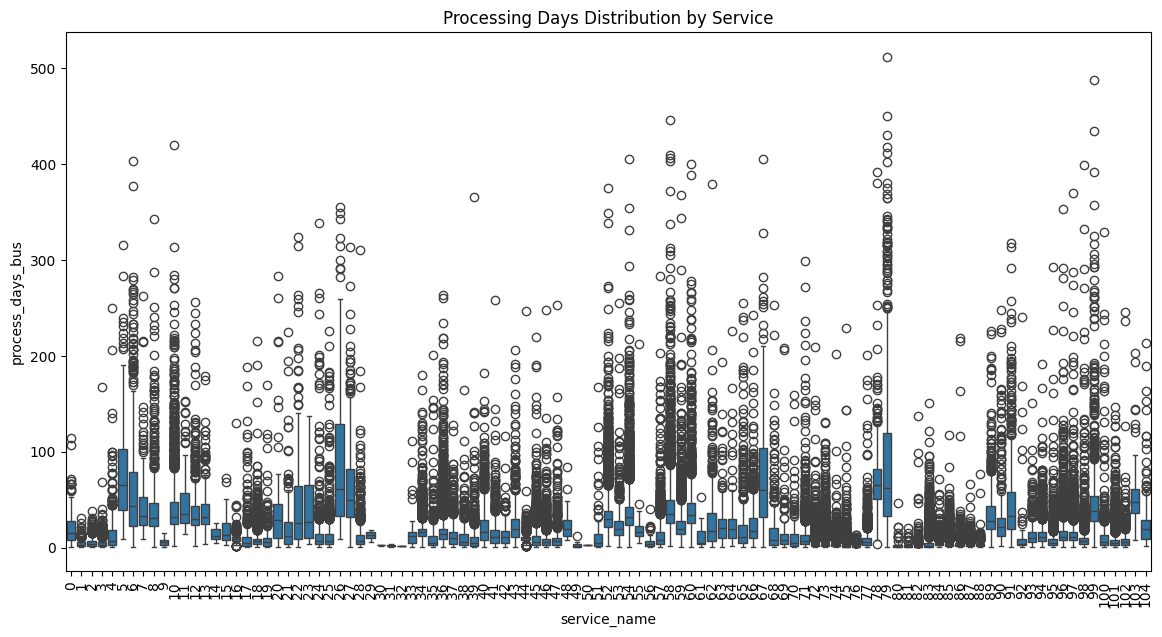

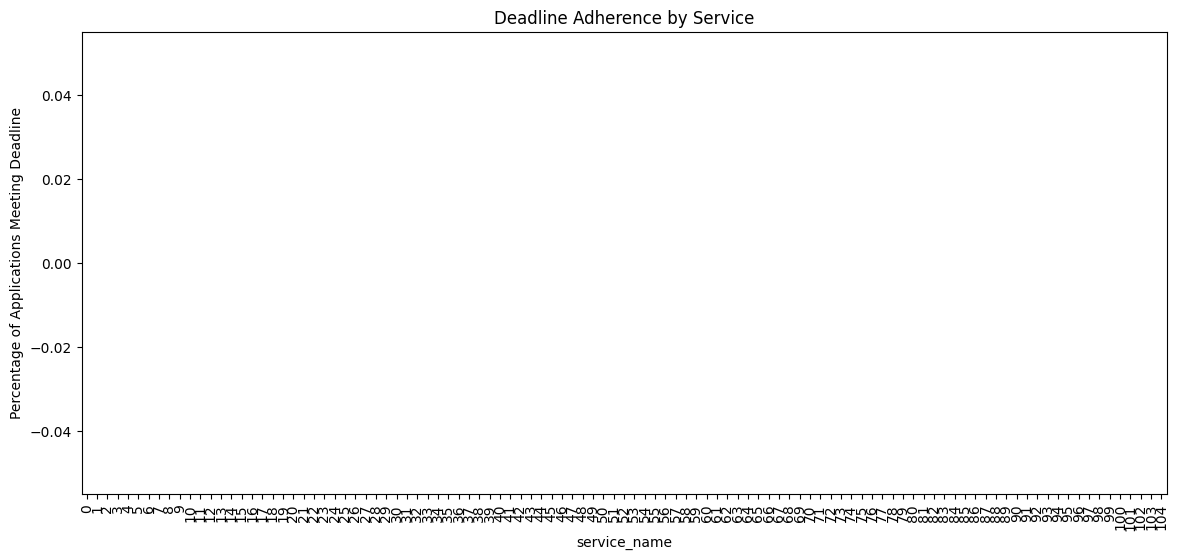

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Convert to datetime
df['bw_created_on'] = pd.to_datetime(df['bw_created_on'], errors='coerce')
df['ta_deadline'] = pd.to_datetime(df['ta_deadline'], errors='coerce')

# Drop rows with missing key info (ensure dates are not missing for calculation)
df = df.dropna(subset=['bw_created_on', 'process_days_bus', 'delay1', 'sendback_yn', 'reject', 'service_name', 'ta_deadline'])

# Encode categorical columns
label_cols = ['service_name', 'app_department_name', 'desig_name', 'district_name']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Calculate the difference in days between the deadline and creation date
# This results in a Timedelta Series
time_to_deadline = df['ta_deadline'] - df['bw_created_on']

# Check if process_days_bus is less than or equal to the total days until the deadline
# Access the total number of days from the Timedelta object using .dt.days
df['met_deadline'] = df['process_days_bus'] <= time_to_deadline.dt.days

# Compare distribution of processing days vs deadline by service
plt.figure(figsize=(14,7))
sns.boxplot(x='service_name', y='process_days_bus', data=df)
plt.xticks(rotation=90)
plt.title('Processing Days Distribution by Service')
plt.show()

# Deadline met vs missed rate by service
deadline_summary = df.groupby('service_name')['met_deadline'].mean().reset_index()
deadline_summary['met_deadline'] = deadline_summary['met_deadline'] * 100  # percentage

plt.figure(figsize=(14,6))
sns.barplot(x='service_name', y='met_deadline', data=deadline_summary)
plt.xticks(rotation=90)
plt.ylabel('Percentage of Applications Meeting Deadline')
plt.title('Deadline Adherence by Service')
plt.show()

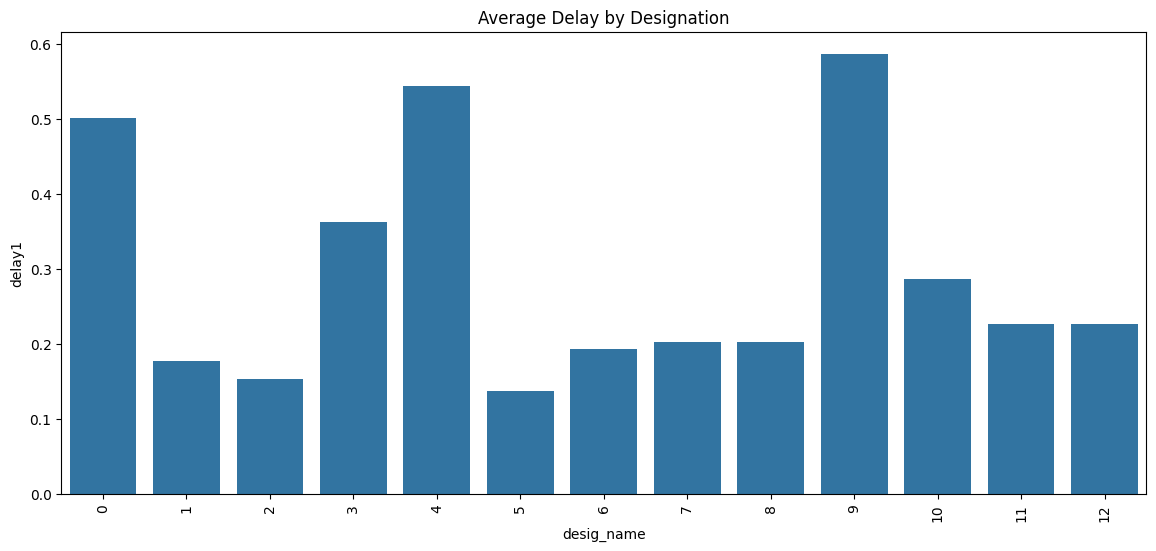

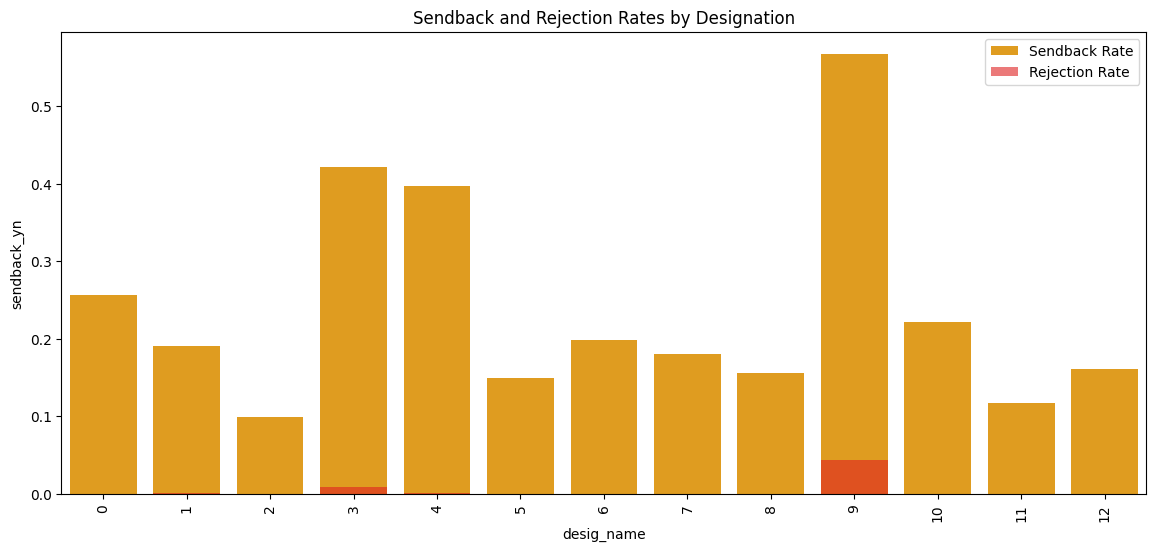

In [87]:
desig_stats = df.groupby('desig_name').agg({
    'process_days_bus': 'mean',
    'delay1': 'mean',
    'sendback_yn': 'mean',
    'reject': 'mean'
}).reset_index()

plt.figure(figsize=(14,6))
sns.barplot(x='desig_name', y='delay1', data=desig_stats)
plt.xticks(rotation=90)
plt.title('Average Delay by Designation')
plt.show()

plt.figure(figsize=(14,6))
sns.barplot(x='desig_name', y='sendback_yn', data=desig_stats, color='orange', label='Sendback Rate')
sns.barplot(x='desig_name', y='reject', data=desig_stats, color='red', alpha=0.6, label='Rejection Rate')
plt.xticks(rotation=90)
plt.legend()
plt.title('Sendback and Rejection Rates by Designation')
plt.show()


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     21592
           1       0.86      0.83      0.84     20844

    accuracy                           0.85     42436
   macro avg       0.85      0.85      0.85     42436
weighted avg       0.85      0.85      0.85     42436


Confusion Matrix:
[[18666  2926]
 [ 3459 17385]]


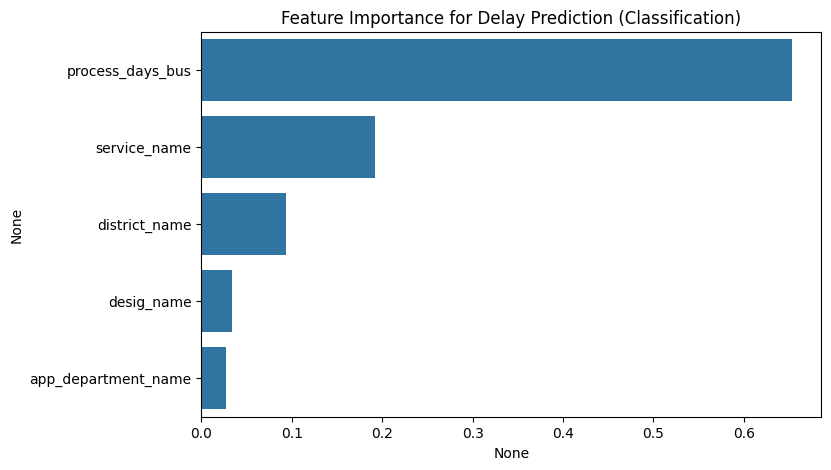

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure df and necessary columns are available (assuming previous cells were run)
# If running this cell independently, reload data and perform preprocessing/encoding
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder
# df = pd.read_csv('/content/user_x_service_x_biweek_data.csv')
# df['bw_created_on'] = pd.to_datetime(df['bw_created_on'], errors='coerce')
# df['ta_deadline'] = pd.to_datetime(df['ta_deadline'], errors='coerce')
# df = df.dropna(subset=['bw_created_on', 'process_days_bus', 'delay1', 'sendback_yn', 'reject', 'service_name', 'ta_deadline'])
# label_cols = ['service_name', 'app_department_name', 'desig_name', 'district_name']
# for col in label_cols:
#     le = LabelEncoder()
#     df[col] = le.fit_transform(df[col])

# Define features and the target variable
features = ['service_name', 'app_department_name', 'desig_name', 'district_name', 'process_days_bus']

# Use the binary target variable 'delay_binary' instead of the continuous 'delay1'
target = 'delay_binary'

X = df[features]
y = df[target] # Use the binary target column

# Split the data
# Stratify by the binary target is good practice for imbalanced classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the RandomForestClassifier model (already suitable for classification)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

# You can also calculate and print the confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance (still relevant for classification)
importances = model.feature_importances_
# Ensure features list aligns with the columns in X
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)


plt.figure(figsize=(8,5))
sns.barplot(x=feat_imp, y=feat_imp.index)
plt.title('Feature Importance for Delay Prediction (Classification)')
plt.show()

In [90]:
# Weighted average delay by department
weighted_delay_dept = (
    df.groupby('app_department_name')
    .apply(lambda x: (x['delay1'] * x['n_apps']).sum() / x['n_apps'].sum())
    .reset_index(name='weighted_avg_delay')
    .sort_values(by='weighted_avg_delay', ascending=False)
)


<ipython-input-90-5b03beaedf60>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: (x['delay1'] * x['n_apps']).sum() / x['n_apps'].sum())


In [91]:
rename_dict = {
    'masked_userid': 'User ID',
    'desig_name': 'Designation',
    'serviceid': 'Service ID',
    'service_name': 'Service Name',
    'ta_deadline': 'Service Deadline',
    'app_department_name': 'Department',
    'district_name': 'District',
    'bw_created_on': 'Application Date',
    'n_apps': 'Number of Applications',
    'process_days_bus': 'Processing Days (Business)',
    'delay1': 'Delayed (1=Yes)',
    'sendback_yn': 'Sendback (1=Yes)',
    'reject': 'Rejected (1=Yes)'
}

df = df.rename(columns=rename_dict)


In [92]:
# Combine metrics into a single summary
dept_summary = (
    df.groupby('Department')
    .apply(lambda x: pd.Series({
        'Weighted Delay': (x['Delayed (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum(),
        'Weighted Sendback': (x['Sendback (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum(),
        'Weighted Rejection': (x['Rejected (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum(),
        'Total Applications': x['Number of Applications'].sum()
    }))
    .reset_index()
    .sort_values(by='Weighted Delay', ascending=False)
    .head(10)
)

print(dept_summary)


   Department  Weighted Delay  Weighted Sendback  Weighted Rejection  \
1           1        0.435910           0.201402        2.404027e-05   
0           0        0.146716           0.105260        1.958965e-04   
5           5        0.119594           0.130988        1.335276e-04   
4           4        0.104596           0.080050        8.541307e-07   
2           2        0.071777           0.058160        1.293215e-06   
3           3        0.067353           0.077780        0.000000e+00   

   Total Applications  
1            332775.0  
0           2970956.0  
5            449345.0  
4           1170781.0  
2            773266.0  
3             95066.0  


<ipython-input-92-031ffc8935ef>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


In [93]:
# Combine metrics into a single summary
dept_summary = (
    df.groupby('Department')
    .apply(lambda x: pd.Series({
        'Weighted Delay': (x['Delayed (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum(),
        'Weighted Sendback': (x['Sendback (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum(),
        'Weighted Rejection': (x['Rejected (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum(),
        'Total Applications': x['Number of Applications'].sum()
    }))
    .reset_index()
    .sort_values(by='Weighted Delay', ascending=False)
    .head(10)
)

print(dept_summary)


   Department  Weighted Delay  Weighted Sendback  Weighted Rejection  \
1           1        0.435910           0.201402        2.404027e-05   
0           0        0.146716           0.105260        1.958965e-04   
5           5        0.119594           0.130988        1.335276e-04   
4           4        0.104596           0.080050        8.541307e-07   
2           2        0.071777           0.058160        1.293215e-06   
3           3        0.067353           0.077780        0.000000e+00   

   Total Applications  
1            332775.0  
0           2970956.0  
5            449345.0  
4           1170781.0  
2            773266.0  
3             95066.0  


<ipython-input-93-031ffc8935ef>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: pd.Series({


In [95]:
import pandas as pd

# Assuming df is loaded
# The columns were renamed in a previous cell.
# Use the new column names for mapping.
# Check the data types of these columns - they might already be numeric (0/1) from previous processing steps.
# If they are still 'Y'/'N' strings, use the new names for mapping:
if 'Sendback (1=Yes)' in df.columns and df['Sendback (1=Yes)'].dtype == 'object':
     df['Sendback (1=Yes)'] = df['Sendback (1=Yes)'].map({'Y': 1, 'N': 0})

if 'Rejected (1=Yes)' in df.columns and df['Rejected (1=Yes)'].dtype == 'object':
    df['Rejected (1=Yes)'] = df['Rejected (1=Yes)'].map({'Y': 1, 'N': 0})

# Group by department and compute weighted averages using the new column names
weighted_stats = df.groupby('Department').apply( # Use 'Department' after renaming
    lambda g: pd.Series({
        # Use 'Processing Days (Business)' and 'Delayed (1=Yes)' after renaming
        'Weighted Avg Process Days': (g['Processing Days (Business)'] * g['Number of Applications']).sum() / g['Number of Applications'].sum(),
        'Weighted Avg Delay': (g['Delayed (1=Yes)'] * g['Number of Applications']).sum() / g['Number of Applications'].sum(),
        # Use 'Sendback (1=Yes)' and 'Rejected (1=Yes)' after mapping/renaming
        'Sendback Rate': (g['Sendback (1=Yes)'] * g['Number of Applications']).sum() / g['Number of Applications'].sum(),
        'Rejection Rate': (g['Rejected (1=Yes)'] * g['Number of Applications']).sum() / g['Number of Applications'].sum(),
        'Total Applications': g['Number of Applications'].sum()
    })
).reset_index()

# Display the result
print(weighted_stats)

   Department  Weighted Avg Process Days  Weighted Avg Delay  Sendback Rate  \
0           0                   8.137672            0.146716       0.105260   
1           1                  22.533108            0.435910       0.201402   
2           2                   8.926470            0.071777       0.058160   
3           3                   5.219237            0.067353       0.077780   
4           4                   9.834744            0.104596       0.080050   
5           5                  21.722590            0.119594       0.130988   

   Rejection Rate  Total Applications  
0    1.958965e-04           2970956.0  
1    2.404027e-05            332775.0  
2    1.293215e-06            773266.0  
3    0.000000e+00             95066.0  
4    8.541307e-07           1170781.0  
5    1.335276e-04            449345.0  


<ipython-input-95-01128658da44>:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_stats = df.groupby('Department').apply( # Use 'Department' after renaming


<ipython-input-97-c3e60f2576af>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  service_stats = df[df['Service Name'].isin(top_services)].groupby('Service Name').apply(


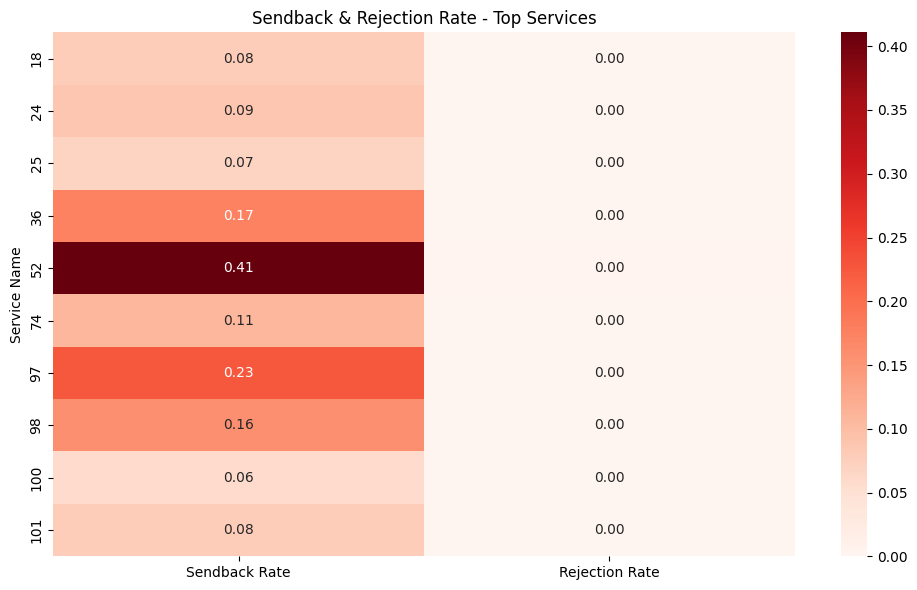

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is loaded and columns have been renamed as in ipython-input-91-631ca099a813
# The new column names are 'Service Name', 'Sendback (1=Yes)', 'Rejected (1=Yes)', 'Number of Applications'

# Use the new column name 'Service Name'
top_services = df['Service Name'].value_counts().nlargest(10).index

# Use the new column names for grouping and calculations
service_stats = df[df['Service Name'].isin(top_services)].groupby('Service Name').apply(
    lambda g: pd.Series({
        # Use 'Sendback (1=Yes)', 'Rejected (1=Yes)', and 'Number of Applications'
        'Sendback Rate': (g['Sendback (1=Yes)'] * g['Number of Applications']).sum() / g['Number of Applications'].sum(),
        'Rejection Rate': (g['Rejected (1=Yes)'] * g['Number of Applications']).sum() / g['Number of Applications'].sum()
    })
).reset_index()

plt.figure(figsize=(10, 6))
# Use the new column name 'Service Name' for setting the index
sns.heatmap(service_stats.set_index('Service Name'), annot=True, cmap='Reds', fmt=".2f")
plt.title("Sendback & Rejection Rate - Top Services")
plt.tight_layout()
plt.show()

In [106]:
import pandas as pd
import numpy as np

# Assuming df is loaded and columns have been renamed as in ipython-input-91-631ca099a813
# The new column names are 'Sendback (1=Yes)', 'Rejected (1=Yes)',
# 'Processing Days (Business)', 'Delayed (1=Yes)', and 'Number of Applications'

import pandas as pd
import numpy as np

# Assuming df is loaded and columns have been renamed as in ipython-input-91-631ca099a813
# The new column names are 'Sendback (1=Yes)', 'Rejected (1=Yes)',
# 'Processing Days (Business)', 'Delayed (1=Yes)', and 'Number of Applications'

# Ensure relevant columns are in proper dtype using the NEW column names
# Check if they are still objects ('Y'/'N') and map if necessary
if 'Sendback (1=Yes)' in df.columns and df['Sendback (1=Yes)'].dtype == 'object':
     df['Sendback (1=Yes)'] = df['Sendback (1=Yes)'].map({'Y': 1, 'N': 0})

if 'Rejected (1=Yes)' in df.columns and df['Rejected (1=Yes)'].dtype == 'object':
    df['Rejected (1=Yes)'] = df['Rejected (1=Yes)'].map({'Y': 1, 'N': 0})

# Replace missing/invalid delays and process_days_bus with 0 if needed
# Use the NEW column names 'Delayed (1=Yes)' and 'Processing Days (Business)'
df['Delayed (1=Yes)'] = pd.to_numeric(df['Delayed (1=Yes)'], errors='coerce').fillna(0)
df['Processing Days (Business)'] = pd.to_numeric(df['Processing Days (Business)'], errors='coerce').fillna(0)
# Assuming 'Number of Applications' column exists and is numeric, fillna if needed
df['Number of Applications'] = pd.to_numeric(df['Number of Applications'], errors='coerce').fillna(0)


# Weighted groupby at office level - Use the NEW column names
grouped = df.groupby('District').apply(lambda x: pd.Series({ # Use 'District' if renamed
    'Weighted Avg Processing Days': np.average(x['Processing Days (Business)'], weights=x['Number of Applications']),
    'Weighted Avg Delay': np.average(x['Delayed (1=Yes)'], weights=x['Number of Applications']),
    'Sendback Rate': (x['Sendback (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum() if x['Number of Applications'].sum() > 0 else 0, # Add check for division by zero
    'Rejection Rate': (x['Rejected (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum() if x['Number of Applications'].sum() > 0 else 0, # Add check for division by zero
    'Total Applications': x['Number of Applications'].sum()
})).reset_index()

# Handle potential division by zero if a group has 0 applications
grouped[['Sendback Rate', 'Rejection Rate']] = grouped[['Sendback Rate', 'Rejection Rate']].replace([np.inf, -np.inf], np.nan).fillna(0)


# Top 10 problematic offices
problematic_offices = grouped.sort_values(
    ['Weighted Avg Processing Days', 'Weighted Avg Delay', 'Sendback Rate', 'Rejection Rate'],
    ascending=False
).head(10)
import pandas as pd
import numpy as np

# Assuming df is loaded and columns have been renamed as in ipython-input-91-631ca099a813
# The new column names are 'Sendback (1=Yes)', 'Rejected (1=Yes)',
# 'Processing Days (Business)', 'Delayed (1=Yes)', and 'Number of Applications'

import pandas as pd
import numpy as np

# Assuming df is loaded and columns have been renamed as in ipython-input-91-631ca099a813
# The new column names are 'Sendback (1=Yes)', 'Rejected (1=Yes)',
# 'Processing Days (Business)', 'Delayed (1=Yes)', and 'Number of Applications'

# Ensure relevant columns are in proper dtype using the NEW column names
# Check if they are still objects ('Y'/'N') and map if necessary
if 'Sendback (1=Yes)' in df.columns and df['Sendback (1=Yes)'].dtype == 'object':
     df['Sendback (1=Yes)'] = df['Sendback (1=Yes)'].map({'Y': 1, 'N': 0})

if 'Rejected (1=Yes)' in df.columns and df['Rejected (1=Yes)'].dtype == 'object':
    df['Rejected (1=Yes)'] = df['Rejected (1=Yes)'].map({'Y': 1, 'N': 0})

# Replace missing/invalid delays and process_days_bus with 0 if needed
# Use the NEW column names 'Delayed (1=Yes)' and 'Processing Days (Business)'
df['Delayed (1=Yes)'] = pd.to_numeric(df['Delayed (1=Yes)'], errors='coerce').fillna(0)
df['Processing Days (Business)'] = pd.to_numeric(df['Processing Days (Business)'], errors='coerce').fillna(0)
# Assuming 'Number of Applications' column exists and is numeric, fillna if needed
df['Number of Applications'] = pd.to_numeric(df['Number of Applications'], errors='coerce').fillna(0)


# Weighted groupby at office level - Use the NEW column names
grouped = df.groupby('District').apply(lambda x: pd.Series({ # Use 'District' if renamed
    'Weighted Avg Processing Days': np.average(x['Processing Days (Business)'], weights=x['Number of Applications']),
    'Weighted Avg Delay': np.average(x['Delayed (1=Yes)'], weights=x['Number of Applications']),
    'Sendback Rate': (x['Sendback (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum() if x['Number of Applications'].sum() > 0 else 0, # Add check for division by zero
    'Rejection Rate': (x['Rejected (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum() if x['Number of Applications'].sum() > 0 else 0, # Add check for division by zero
    'Total Applications': x['Number of Applications'].sum()
})).reset_index()

# Handle potential division by zero if a group has 0 applications
grouped[['Sendback Rate', 'Rejection Rate']] = grouped[['Sendback Rate', 'Rejection Rate']].replace([np.inf, -np.inf], np.nan).fillna(0)


# Top 10 problematic offices
problematic_offices = grouped.sort_values(
    ['Weighted Avg Processing Days', 'Weighted Avg Delay', 'Sendback Rate', 'Rejection Rate'],
    ascending=False
).head(10)

problematic_offices
if 'Rejected (1=Yes)' in df.columns and df['Rejected (1=Yes)'].dtype == 'object':
    df['Rejected (1=Yes)'] = df['Rejected (1=Yes)'].map({'Y': 1, 'N': 0})

# Replace missing/invalid delays and process_days_bus with 0 if needed
# Use the NEW column names 'Delayed (1=Yes)' and 'Processing Days (Business)'
df['Delayed (1=Yes)'] = pd.to_numeric(df['Delayed (1=Yes)'], errors='coerce').fillna(0)
df['Processing Days (Business)'] = pd.to_numeric(df['Processing Days (Business)'], errors='coerce').fillna(0)
# Assuming 'Number of Applications' column exists and is numeric, fillna if needed
df['Number of Applications'] = pd.to_numeric(df['Number of Applications'], errors='coerce').fillna(0)


# Weighted groupby at office level - Use the NEW column names
grouped = df.groupby('District').apply(lambda x: pd.Series({ # Use 'District' if renamed
    'Weighted Avg Processing Days': np.average(x['Processing Days (Business)'], weights=x['Number of Applications']),
    'Weighted Avg Delay': np.average(x['Delayed (1=Yes)'], weights=x['Number of Applications']),
    'Sendback Rate': (x['Sendback (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum() if x['Number of Applications'].sum() > 0 else 0, # Add check for division by zero
    'Rejection Rate': (x['Rejected (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum() if x['Number of Applications'].sum() > 0 else 0, # Add check for division by zero
    'Total Applications': x['Number of Applications'].sum()
})).reset_index()

# Handle potential division by zero if a group has 0 applications
grouped[['Sendback Rate', 'Rejection Rate']] = grouped[['Sendback Rate', 'Rejection Rate']].replace([np.inf, -np.inf], np.nan).fillna(0)


# Top 10 problematic offices
problematic_offices = grouped.sort_values(
    ['Weighted Avg Processing Days', 'Weighted Avg Delay', 'Sendback Rate', 'Rejection Rate'],
    ascending=False
).head(10)

problematic_offices
# Replace missing/invalid delays and process_days_bus with 0 if needed
# Use the NEW column names 'Delayed (1=Yes)' and 'Processing Days (Business)'
df['Delayed (1=Yes)'] = pd.to_numeric(df['Delayed (1=Yes)'], errors='coerce').fillna(0)
df['Processing Days (Business)'] = pd.to_numeric(df['Processing Days (Business)'], errors='coerce').fillna(0)
# Assuming 'Number of Applications' column exists and is numeric, fillna if needed
df['Number of Applications'] = pd.to_numeric(df['Number of Applications'], errors='coerce').fillna(0)


# Weighted groupby at office level - Use the NEW column names
grouped = df.groupby('District').apply(lambda x: pd.Series({ # Use 'District' if renamed
    'Weighted Avg Processing Days': np.average(x['Processing Days (Business)'], weights=x['Number of Applications']),
    'Weighted Avg Delay': np.average(x['Delayed (1=Yes)'], weights=x['Number of Applications']),
    'Sendback Rate': (x['Sendback (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum() if x['Number of Applications'].sum() > 0 else 0, # Add check for division by zero
    'Rejection Rate': (x['Rejected (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum() if x['Number of Applications'].sum() > 0 else 0, # Add check for division by zero
    'Total Applications': x['Number of Applications'].sum()
})).reset_index()

# Handle potential division by zero if a group has 0 applications
grouped[['Sendback Rate', 'Rejection Rate']] = grouped[['Sendback Rate', 'Rejection Rate']].replace([np.inf, -np.inf], np.nan).fillna(0)


# Top 10 problematic offices
problematic_offices = grouped.sort_values(
    ['Weighted Avg Processing Days', 'Weighted Avg Delay', 'Sendback Rate', 'Rejection Rate'],
    ascending=False
).head(10)

problematic_offices

<ipython-input-106-4350033e0611>:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby('District').apply(lambda x: pd.Series({ # Use 'District' if renamed
<ipython-input-106-4350033e0611>:80: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  grouped = df.groupby('District').apply(lambda x: pd.Series({ # Use 'District' if renamed
<ipython-input-106-4350033e0611>:111: DeprecationWarning: DataFram

District  Weighted Avg Processing Days  Weighted Avg Delay  Sendback Rate  \
22        22                     14.960698            0.215769       0.078734   
0          0                     14.588214            0.217214       0.105241   
6          6                     13.660761            0.223484       0.115456   
14        14                     13.338976            0.189385       0.095195   
11        11                     12.763724            0.255268       0.122212   
12        12                     11.872259            0.207561       0.143013   
21        21                     11.591252            0.148233       0.101760   
20        20                     11.490230            0.117299       0.110177   
16        16                     11.474179            0.161515       0.111201   
1          1                     11.304439            0.144414       0.097455   

    Rejection Rate  Total Applications  
22        0.000167            185791.0  
0         0.000058            495995.0  
6         0.000060            184805.0  
14        0.000113            176682.0  
11        0.000167            562574.0  
12        0.000081             86871.0  
21        0.000070            184857.0  
20        0.000278            244724.0  
16        0.000067            387191.0  
1         0.000091            121131.0

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_services = service_analysis.sort_values('Avg Delay', ascending=False).head(10)
sns.barplot(data=top_services, x='Avg Delay', y='service_name', palette="flare")
plt.title('Top 10 Services with Highest Average Delay')
plt.xlabel("Average Delay (Days)")
plt.ylabel("Service Name")
plt.tight_layout()
plt.show()


ValueError: Could not interpret value `service_name` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

<ipython-input-110-4ac97ffa76d8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_services, x='Avg Delay', y='Service Name', palette="flare")


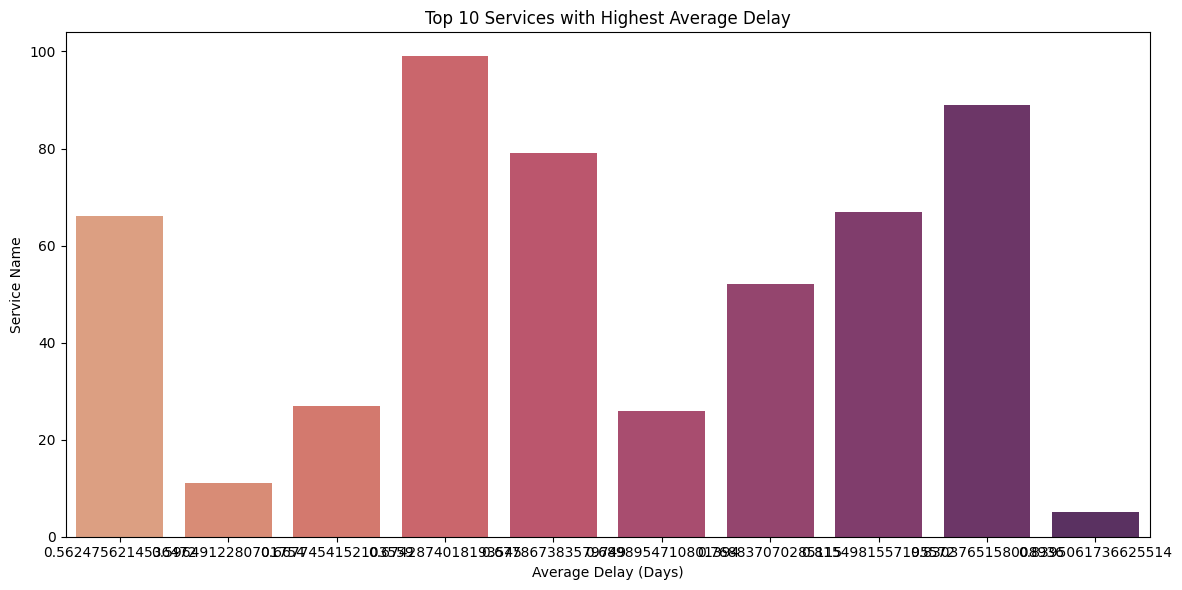

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
top_services = service_analysis.sort_values('Avg Delay', ascending=False).head(10)
# Change 'service_name' to 'Service Name'
sns.barplot(data=top_services, x='Avg Delay', y='Service Name', palette="flare")
plt.title('Top 10 Services with Highest Average Delay')
plt.xlabel("Average Delay (Days)")
plt.ylabel("Service Name")
plt.tight_layout()
plt.show()

In [108]:
# By Service
service_analysis = df.groupby('Service Name').apply(lambda x: pd.Series({
    'Avg Delay': np.average(x['Delayed (1=Yes)'], weights=x['Number of Applications']),
    'Processing Days': np.average(x['Processing Days (Business)'], weights=x['Number of Applications']),
    'Sendback Rate': (x['Sendback (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum() if x['Number of Applications'].sum() > 0 else 0,
    'Rejection Rate': (x['Rejected (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum() if x['Number of Applications'].sum() > 0 else 0,
    'Total Applications': x['Number of Applications'].sum()
})).reset_index().sort_values("Avg Delay", ascending=False)

# Handle potential division by zero if a group has 0 applications
service_analysis[['Sendback Rate', 'Rejection Rate']] = service_analysis[['Sendback Rate', 'Rejection Rate']].replace([np.inf, -np.inf], np.nan).fillna(0)


print("Service Analysis:")
print(service_analysis)


# Similar analysis for Designation
desig_analysis = df.groupby('Designation').apply(lambda x: pd.Series({
    'Avg Delay': np.average(x['Delayed (1=Yes)'], weights=x['Number of Applications']),
    'Processing Days': np.average(x['Processing Days (Business)'], weights=x['Number of Applications']),
    'Sendback Rate': (x['Sendback (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum() if x['Number of Applications'].sum() > 0 else 0,
    'Rejection Rate': (x['Rejected (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum() if x['Number of Applications'].sum() > 0 else 0,
    'Total Applications': x['Number of Applications'].sum()
})).reset_index().sort_values("Avg Delay", ascending=False)

# Handle potential division by zero
desig_analysis[['Sendback Rate', 'Rejection Rate']] = desig_analysis[['Sendback Rate', 'Rejection Rate']].replace([np.inf, -np.inf], np.nan).fillna(0)


print("\nDesignation Analysis:")
print(desig_analysis)


# Similar analysis for Department
dept_analysis = df.groupby('Department').apply(lambda x: pd.Series({
    'Avg Delay': np.average(x['Delayed (1=Yes)'], weights=x['Number of Applications']),
    'Processing Days': np.average(x['Processing Days (Business)'], weights=x['Number of Applications']),
    'Sendback Rate': (x['Sendback (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum() if x['Number of Applications'].sum() > 0 else 0,
    'Rejection Rate': (x['Rejected (1=Yes)'] * x['Number of Applications']).sum() / x['Number of Applications'].sum() if x['Number of Applications'].sum() > 0 else 0,
    'Total Applications': x['Number of Applications'].sum()
})).reset_index().sort_values("Avg Delay", ascending=False)

# Handle potential division by zero
dept_analysis[['Sendback Rate', 'Rejection Rate']] = dept_analysis[['Sendback Rate', 'Rejection Rate']].replace([np.inf, -np.inf], np.nan).fillna(0)


print("\nDepartment Analysis:")
print(dept_analysis)

Service Analysis:
    Service Name  Avg Delay  Processing Days  Sendback Rate  Rejection Rate  \
5              5   0.839506        82.304527       0.251029        0.000000   
89            89   0.830377        31.668028       0.124050        0.000000   
67            67   0.815498        74.675277       0.372694        0.000000   
52            52   0.768837        33.666800       0.410907        0.003196   
26            26   0.689895        86.881533       0.571429        0.000000   
..           ...        ...              ...            ...             ...   
32            32   0.000000         2.000000       0.000000        0.000000   
14            14   0.000000        14.333333       0.000000        0.000000   
9              9   0.000000         5.800000       0.000000        0.000000   
49            49   0.000000         3.230769       0.230769        0.000000   
50            50   0.000000         3.000000       0.000000        0.000000   

    Total Applications  
5       

<ipython-input-108-995194b3563f>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  service_analysis = df.groupby('Service Name').apply(lambda x: pd.Series({
<ipython-input-108-995194b3563f>:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  desig_analysis = df.groupby('Designation').apply(lambda x: pd.Series({
<ipython-input-108-995194b3563f>:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grou

In [111]:


print("\n🏆 Offices Consistently Ranking High in Problematic Metrics:")

# Offices with high Weighted Avg Processing Days
top_processing_days_offices = grouped.sort_values('Weighted Avg Processing Days', ascending=False).head(10)['District'].tolist()
print(f"\nTop 10 by Weighted Avg Processing Days: {top_processing_days_offices}")

# Offices with high Weighted Avg Delay
top_delay_offices = grouped.sort_values('Weighted Avg Delay', ascending=False).head(10)['District'].tolist()
print(f"Top 10 by Weighted Avg Delay: {top_delay_offices}")

# Offices with high Sendback Rate
top_sendback_offices = grouped.sort_values('Sendback Rate', ascending=False).head(10)['District'].tolist()
print(f"Top 10 by Sendback Rate: {top_sendback_offices}")

# Offices with high Rejection Rate
top_rejection_offices = grouped.sort_values('Rejection Rate', ascending=False).head(10)['District'].tolist()
print(f"Top 10 by Rejection Rate: {top_rejection_offices}")

# To find offices consistently high, we can look for overlaps in these lists or
# filter the grouped dataframe for offices that are in the top N for *multiple* metrics.

# Example: Offices in the top 10 for at least 3 of the 4 metrics
# Create a combined list of offices from the top lists
combined_top_offices = top_processing_days_offices + top_delay_offices + top_sendback_offices + top_rejection_offices

# Count how many times each office appears in the top lists
from collections import Counter
office_counts = Counter(combined_top_offices)

# Identify offices appearing in at least 3 top lists
consistently_high_offices = [office for office, count in office_counts.items() if count >= 3]

print(f"\nOffices appearing in Top 10 for 3+ metrics: {consistently_high_offices}")

# Display the stats for these consistently high offices
print("\nDetailed Stats for Consistently High Offices:")
print(grouped[grouped['District'].isin(consistently_high_offices)].sort_values(
    ['Weighted Avg Processing Days', 'Weighted Avg Delay', 'Sendback Rate', 'Rejection Rate'],
    ascending=False
))


# Question 2: Are delays or inefficiencies service-specific, designation-specific, or department-specific?

print("\n🔍 Analyzing if delays/inefficiencies are Service, Designation, or Department Specific:")

# This question can be addressed by looking at the relative magnitude of the metrics
# (Avg Delay, Processing Days, Sendback, Rejection) across the different categories.
# We already calculated these analyses in previous steps: service_analysis, desig_analysis, dept_analysis.
# Print and visually inspect these dataframes.

print("\n--- Service-Specific Analysis ---")
print(service_analysis.head()) # Show top services by delay

# Check spread of metrics across services
print("\nService Metrics Spread (Std Dev):")
print(service_analysis[['Avg Delay', 'Processing Days', 'Sendback Rate', 'Rejection Rate']].std())

# Check if top issues are concentrated in a few services or spread out
print("\nTop 5 Services by Delay Rate:")
print(service_analysis[['Service Name', 'Avg Delay']].head())
print("\nBottom 5 Services by Delay Rate:")
print(service_analysis[['Service Name', 'Avg Delay']].tail())


print("\n--- Designation-Specific Analysis ---")
print(desig_analysis.head()) # Show top designations by delay

# Check spread of metrics across designations
print("\nDesignation Metrics Spread (Std Dev):")
print(desig_analysis[['Avg Delay', 'Processing Days', 'Sendback Rate', 'Rejection Rate']].std())

# Check if top issues are concentrated in a few designations or spread out
print("\nTop 5 Designations by Delay Rate:")
print(desig_analysis[['Designation', 'Avg Delay']].head())
print("\nBottom 5 Designations by Delay Rate:")
print(desig_analysis[['Designation', 'Avg Delay']].tail())


print("\n--- Department-Specific Analysis ---")
print(dept_analysis.head()) # Show top departments by delay

# Check spread of metrics across departments
print("\nDepartment Metrics Spread (Std Dev):")
print(dept_analysis[['Avg Delay', 'Processing Days', 'Sendback Rate', 'Rejection Rate']].std())

# Check if top issues are concentrated in a few departments or spread out
print("\nTop 5 Departments by Delay Rate:")
print(dept_analysis[['Department', 'Avg Delay']].head())
print("\nBottom 5 Departments by Delay Rate:")
print(dept_analysis[['Department', 'Avg Delay']].tail())


# Interpretation:
# - Compare the standard deviations: A higher standard deviation for a category (Service, Designation, Department)
#   suggests that the metric (e.g., Delay Rate) varies more significantly within that category.
#   If the standard deviation for 'Avg Delay' is much higher for Services than for Designations or Departments,
#   it implies that delays are more 'service-specific' - certain services have much higher delays than others.
# - Look at the concentration of issues: Are the top problematic entries (by Avg Delay, etc.) highly concentrated
#   within a few categories (e.g., just 2-3 services account for most of the delay) or are issues spread across many?
# - Consider Total Applications: Categories with very low total applications might show extreme rates that are not representative.

# Conclusion based on std dev and ranking:
# If std dev is highest for 'Service Name', delays are most service-specific.
# If std dev is highest for 'Designation', delays are most designation-specific.
# If std dev is highest for 'Department', delays are most department-specific.
# If standard deviations are similar, inefficiencies might be more uniformly distributed or influenced by multiple factors.

print("\nBased on the standard deviation of the metrics across categories, we can infer the relative specificity:")
# Compare the standard deviations printed above to draw a conclusion.
# Example (requires looking at printed output):
# If Department Std Dev > Service Std Dev > Designation Std Dev for 'Avg Delay',
# then delays are most department-specific, followed by service-specific, and least designation-specific.



🏆 Offices Consistently Ranking High in Problematic Metrics:

Top 10 by Weighted Avg Processing Days: [22, 0, 6, 14, 11, 12, 21, 20, 16, 1]
Top 10 by Weighted Avg Delay: [11, 6, 0, 22, 12, 14, 16, 21, 19, 1]
Top 10 by Sendback Rate: [12, 18, 10, 11, 6, 16, 5, 20, 13, 0]
Top 10 by Rejection Rate: [20, 19, 4, 8, 11, 22, 3, 7, 5, 14]

Offices appearing in Top 10 for 3+ metrics: [22, 0, 6, 14, 11, 12, 20, 16]

Detailed Stats for Consistently High Offices:
    District  Weighted Avg Processing Days  Weighted Avg Delay  Sendback Rate  \
22        22                     14.960698            0.215769       0.078734   
0          0                     14.588214            0.217214       0.105241   
6          6                     13.660761            0.223484       0.115456   
14        14                     13.338976            0.189385       0.095195   
11        11                     12.763724            0.255268       0.122212   
12        12                     11.872259            0.20

In [112]:


from IPython.display import display, HTML

# Display the weighted stats dataframe with better formatting
print("\n🏢 Weighted Statistics by District:")
display(grouped.style.background_gradient(cmap='Blues', subset=['Total Applications']).format({
    'Weighted Avg Processing Days': '{:.2f}',
    'Weighted Avg Delay': '{:.2f}',
    'Sendback Rate': '{:.2%}',
    'Rejection Rate': '{:.2%}',
    'Total Applications': '{:,.0f}'
}))

# Display the problematic offices dataframe
print("\n🚨 Top 10 Most Problematic Districts (Based on Weighted Metrics):")
display(problematic_offices.style.background_gradient(cmap='Oranges').format({
    'Weighted Avg Processing Days': '{:.2f}',
    'Weighted Avg Delay': '{:.2f}',
    'Sendback Rate': '{:.2%}',
    'Rejection Rate': '{:.2%}',
    'Total Applications': '{:,.0f}'
}))

# Display Service Analysis
print("\n📊 Service Performance Analysis:")
display(service_analysis.style.background_gradient(cmap='Reds', subset=['Avg Delay', 'Sendback Rate', 'Rejection Rate']).format({
    'Avg Delay': '{:.2f}',
    'Processing Days': '{:.2f}',
    'Sendback Rate': '{:.2%}',
    'Rejection Rate': '{:.2%}',
    'Total Applications': '{:,.0f}'
}))

# Display Designation Analysis
print("\n👤 Designation Performance Analysis:")
display(desig_analysis.style.background_gradient(cmap='Greens', subset=['Avg Delay', 'Sendback Rate', 'Rejection Rate']).format({
    'Avg Delay': '{:.2f}',
    'Processing Days': '{:.2f}',
    'Sendback Rate': '{:.2%}',
    'Rejection Rate': '{:.2%}',
    'Total Applications': '{:,.0f}'
}))

# Display Department Analysis
print("\n🏛️ Department Performance Analysis:")
display(dept_analysis.style.background_gradient(cmap='Purples', subset=['Avg Delay', 'Sendback Rate', 'Rejection Rate']).format({
    'Avg Delay': '{:.2f}',
    'Processing Days': '{:.2f}',
    'Sendback Rate': '{:.2%}',
    'Rejection Rate': '{:.2%}',
    'Total Applications': '{:,.0f}'
}))

# Display consistently high offices from Question 1 more clearly
print(f"\n🔥 Districts appearing in Top 10 for 3+ Problematic Metrics: {consistently_high_offices}")
display(grouped[grouped['District'].isin(consistently_high_offices)].sort_values(
    ['Weighted Avg Processing Days', 'Weighted Avg Delay', 'Sendback Rate', 'Rejection Rate'],
    ascending=False
).style.background_gradient(cmap='YlOrRd').format({
    'Weighted Avg Processing Days': '{:.2f}',
    'Weighted Avg Delay': '{:.2f}',
    'Sendback Rate': '{:.2%}',
    'Rejection Rate': '{:.2%}',
    'Total Applications': '{:,.0f}'
}))

# Enhance the presentation of standard deviations for Question 2
print("\n📈 Standard Deviation of Performance Metrics Across Categories:")
std_devs = pd.DataFrame({
    'Service': service_analysis[['Avg Delay', 'Processing Days', 'Sendback Rate', 'Rejection Rate']].std(),
    'Designation': desig_analysis[['Avg Delay', 'Processing Days', 'Sendback Rate', 'Rejection Rate']].std(),
    'Department': dept_analysis[['Avg Delay', 'Processing Days', 'Sendback Rate', 'Rejection Rate']].std()
})
display(std_devs.style.background_gradient(cmap='viridis').format('{:.4f}'))

# Interpretation Guidance:
print("\n💡 Interpretation Guidance (Refer to Standard Deviation Table):")
print("- Compare the values in each row (metric).")
print("- A higher value indicates that the metric varies more significantly across the categories in that column.")
print("- For example, if 'Avg Delay' is highest for 'Service', then average delays are most variable between different services.")
print("- This suggests that delays are more 'service-specific' than designation or department-specific.")
print("- If values are similar, the metric might be influenced by multiple factors or is more uniformly distributed across categories.")
print("- Note: Interpret cautiously for categories with very low 'Total Applications'.")


🏢 Weighted Statistics by District:



🚨 Top 10 Most Problematic Districts (Based on Weighted Metrics):



📊 Service Performance Analysis:



👤 Designation Performance Analysis:



🏛️ Department Performance Analysis:



🔥 Districts appearing in Top 10 for 3+ Problematic Metrics: [22, 0, 6, 14, 11, 12, 20, 16]



📈 Standard Deviation of Performance Metrics Across Categories:



💡 Interpretation Guidance (Refer to Standard Deviation Table):
- Compare the values in each row (metric).
- A higher value indicates that the metric varies more significantly across the categories in that column.
- For example, if 'Avg Delay' is highest for 'Service', then average delays are most variable between different services.
- This suggests that delays are more 'service-specific' than designation or department-specific.
- If values are similar, the metric might be influenced by multiple factors or is more uniformly distributed across categories.
- Note: Interpret cautiously for categories with very low 'Total Applications'.
